# Importación de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pickle
import math
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn import metrics
from sklearn.metrics import classification_report
from keras import layers
from google.colab import drive
import plotly.graph_objs as go
import plotly.offline as pyo
from imblearn.combine import SMOTEENN
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz,plot_tree
from six import StringIO
from IPython.display import Image
import pydotplus
import collections
import joblib
from sklearn.linear_model import LinearRegression as LR
from sklearn.svm import SVC

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# IMPORTACIÓN DE LA BASE DE DATOS (Prima Indians Diabetes)

## EN GOOGLE COLAB

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codigo-TFM/data/diabetes.csv')

## EN JUPYTER NOTEBOOK

In [ ]:
df = pd.read_csv('../data/diabetes.csv', sep=',', encoding="latin-1")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# ANALISIS VARIABLES

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


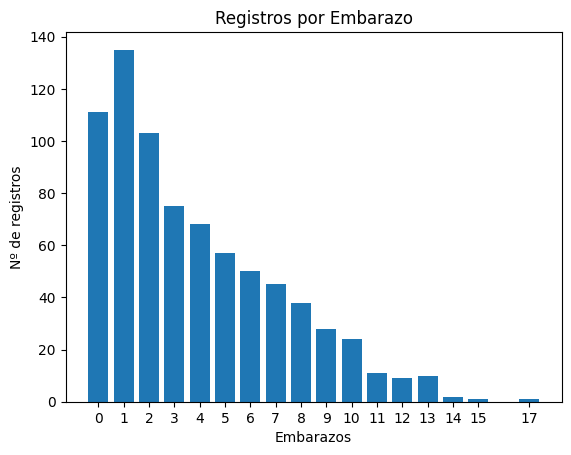

In [ ]:
labels, counts = np.unique(df['Pregnancies'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Embarazo')
plt.xlabel('Embarazos')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.rcParams["figure.figsize"] = (12,5)
plt.show()

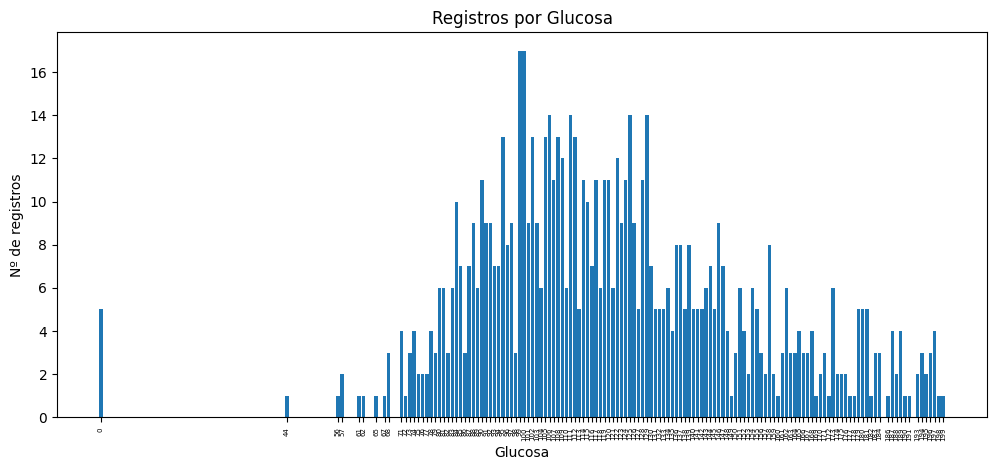

In [ ]:
labels, counts = np.unique(df['Glucose'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Nº de registros')

plt.gca().set_xticks(labels)
plt.gca().set_xticklabels(labels, rotation=90, fontsize=5)

plt.rcParams["figure.figsize"] = (12, 5)
plt.show()


Se considera que tener 0 mg/dL de glucosa en sangre es imposible, al nivel de azúcar en la sangre por debajo de los 70 mg/dL se lo considera bajo.

Por tanto se eliminan los registros cuyo valor de glucosa en sangre sea 0.

In [ ]:
# select the rows that match the condition
condition = df['Glucose'] == 0
rows_to_delete = df[condition]

# delete the selected rows from the DataFrame
df = df.drop(rows_to_delete.index)

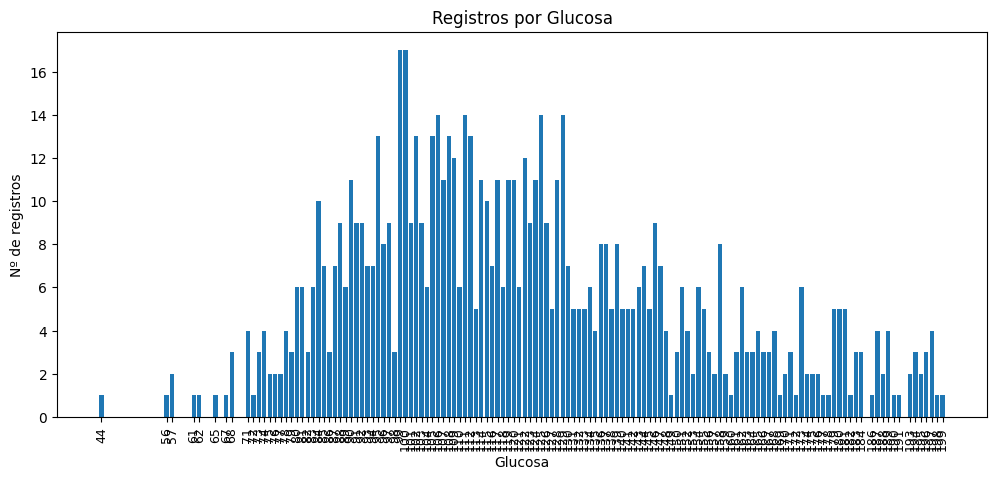

In [ ]:
labels, counts = np.unique(df['Glucose'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Glucosa')
plt.xlabel('Glucosa')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=9)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

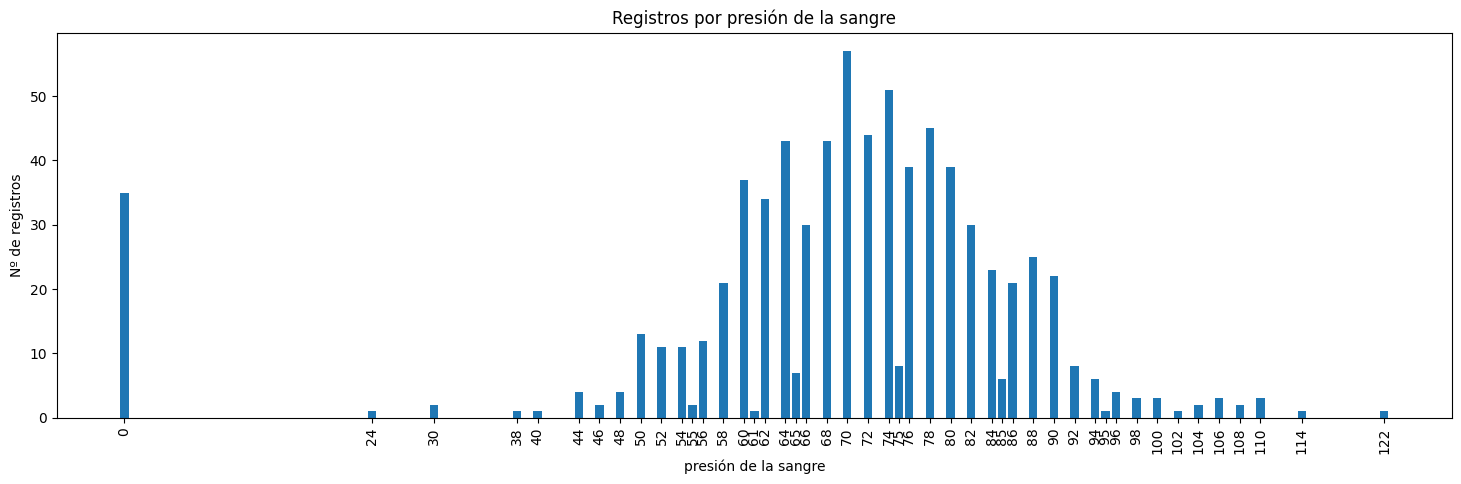

In [ ]:
labels, counts = np.unique(df['BloodPressure'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por presión de la sangre')
plt.xlabel('presión de la sangre')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

In [ ]:
# select the rows that match the condition
condition = df['BloodPressure'] == 0
rows_to_delete = df[condition]

# delete the selected rows from the DataFrame
df = df.drop(rows_to_delete.index)

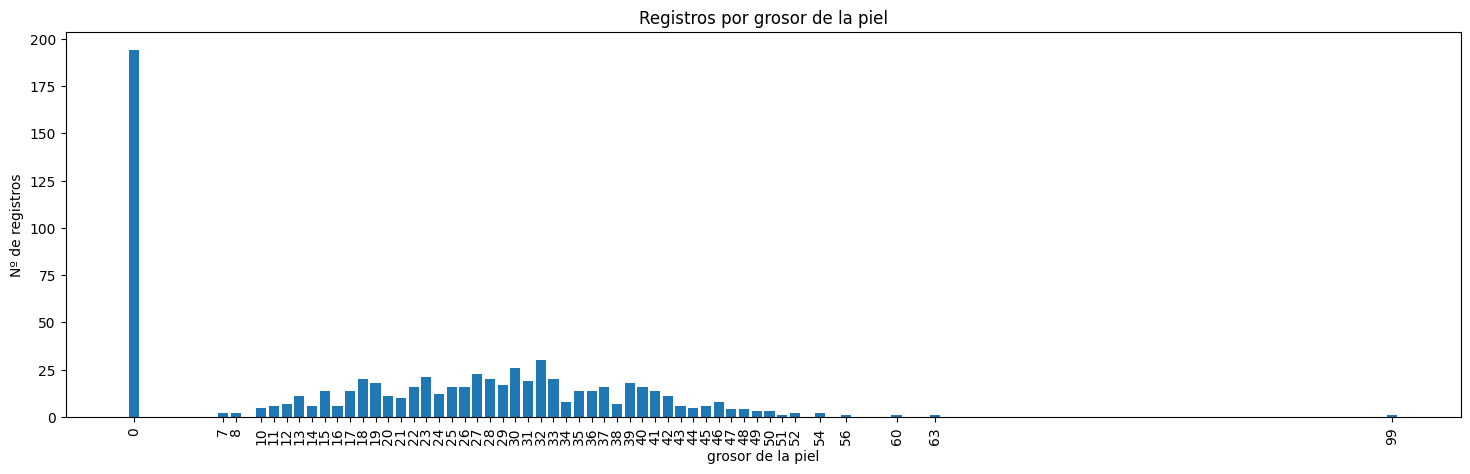

In [ ]:
labels, counts = np.unique(df['SkinThickness'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por grosor de la piel')
plt.xlabel('grosor de la piel')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

El grosor de la piel no puede ser 0, ya que la epidermis de la piel delgada varía de 0,07 a 0,15 milímetros (mm), por lo tanto, se eliminan los registros que contengan 0 como grosor de piel.

In [ ]:
# select the rows that match the condition
condition = df['SkinThickness'] == 0
rows_to_delete = df[condition]

# delete the selected rows from the DataFrame
df = df.drop(rows_to_delete.index)

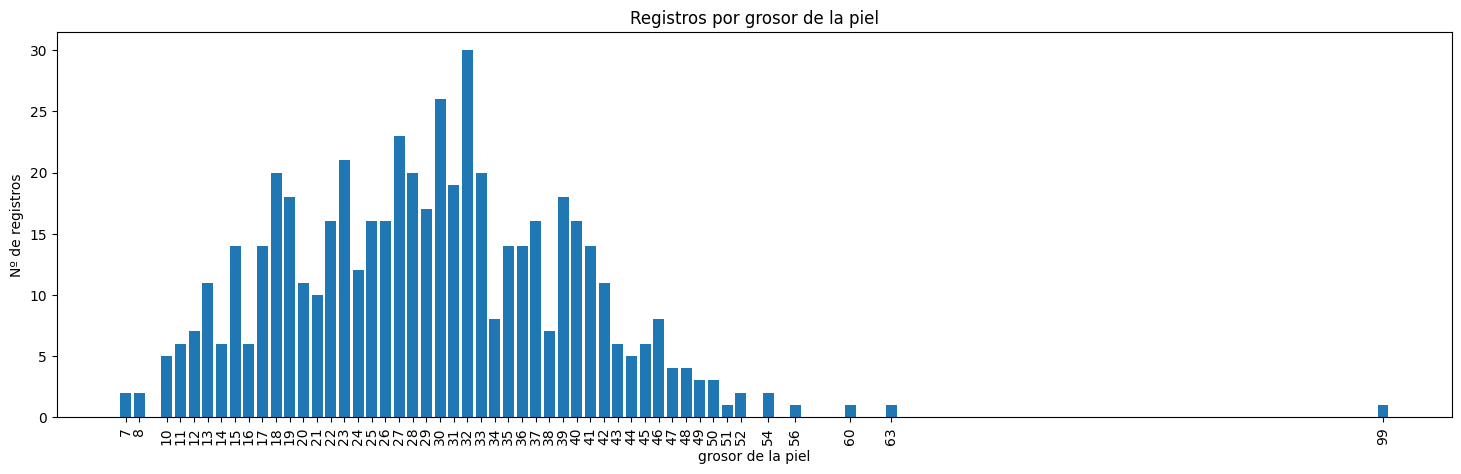

In [ ]:
labels, counts = np.unique(df['SkinThickness'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por grosor de la piel')
plt.xlabel('grosor de la piel')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

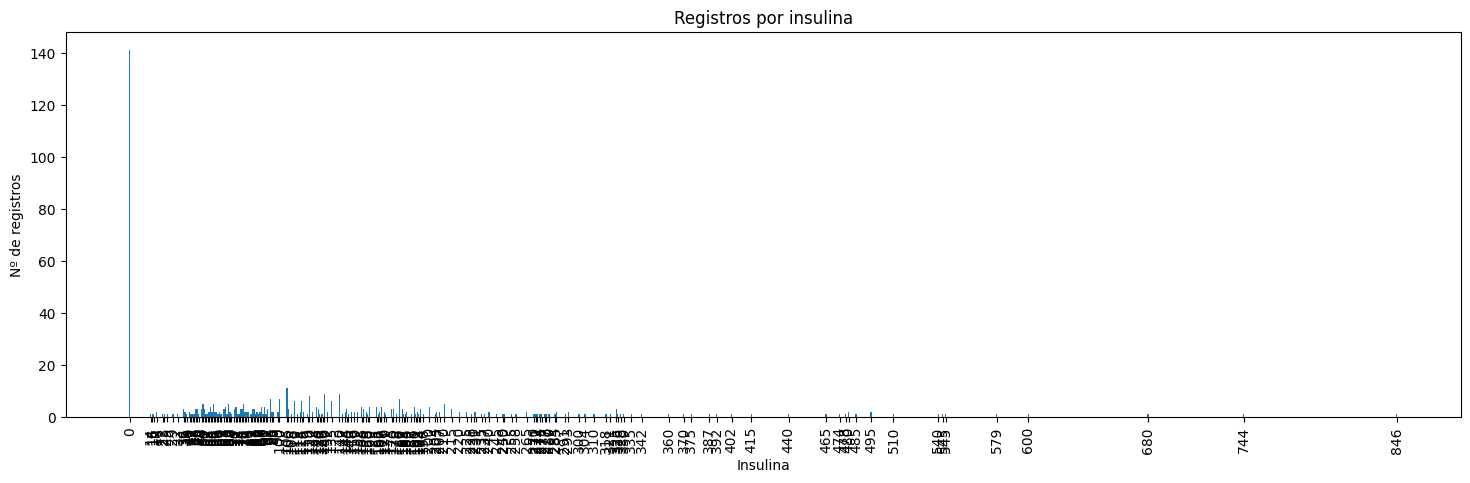

In [ ]:
labels, counts = np.unique(df['Insulin'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por insulina')
plt.xlabel('Insulina')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

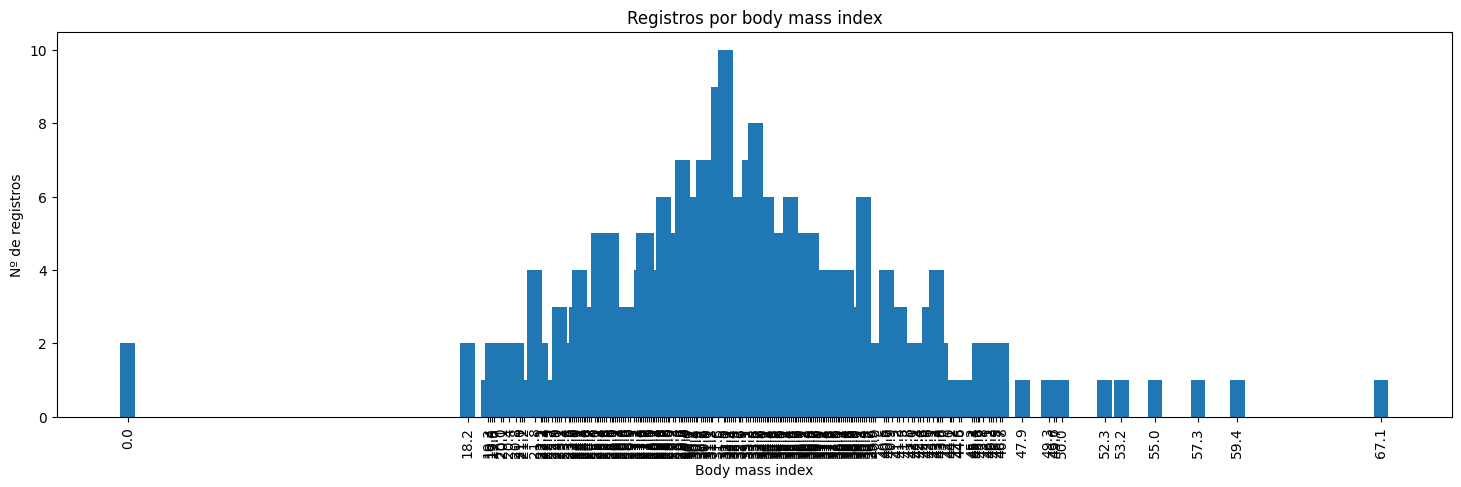

In [ ]:
labels, counts = np.unique(df['BMI'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por body mass index')
plt.xlabel('Body mass index')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

Es imposible que el indice de masa corporal sea 0, ya que el IMC más bajo informado fue de solo 6,7 kg/m², por tanto, se eliminan los registros con valores de 0 en el IMC.

In [ ]:
# select the rows that match the condition
condition = df['BMI'] == 0
rows_to_delete = df[condition]

# delete the selected rows from the DataFrame
df = df.drop(rows_to_delete.index)

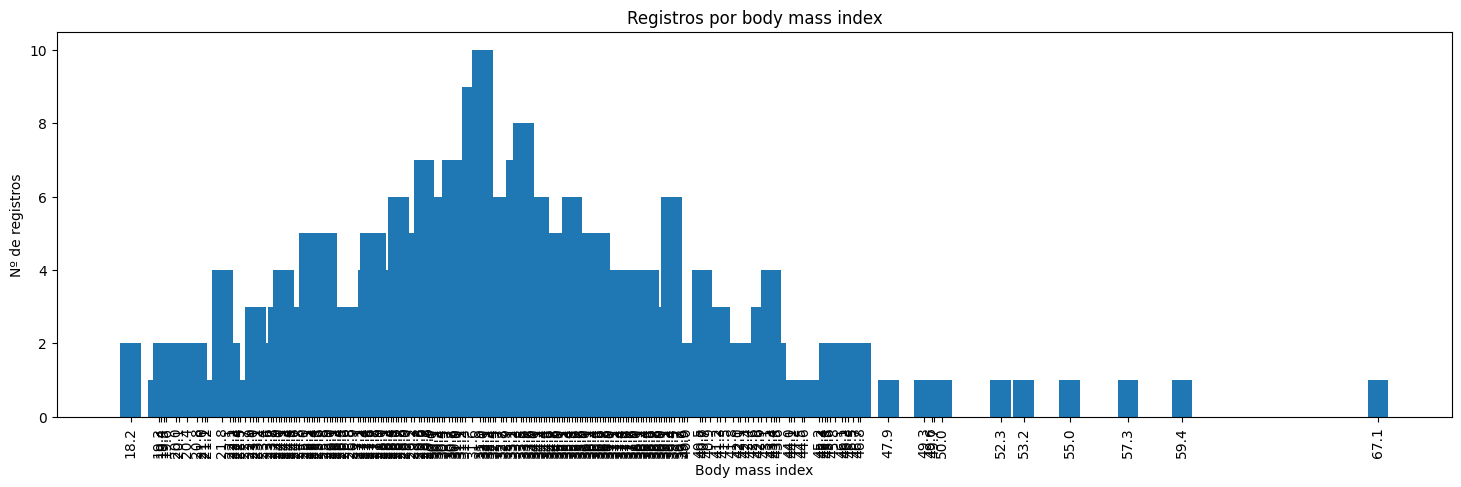

In [ ]:
labels, counts = np.unique(df['BMI'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por body mass index')
plt.xlabel('Body mass index')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

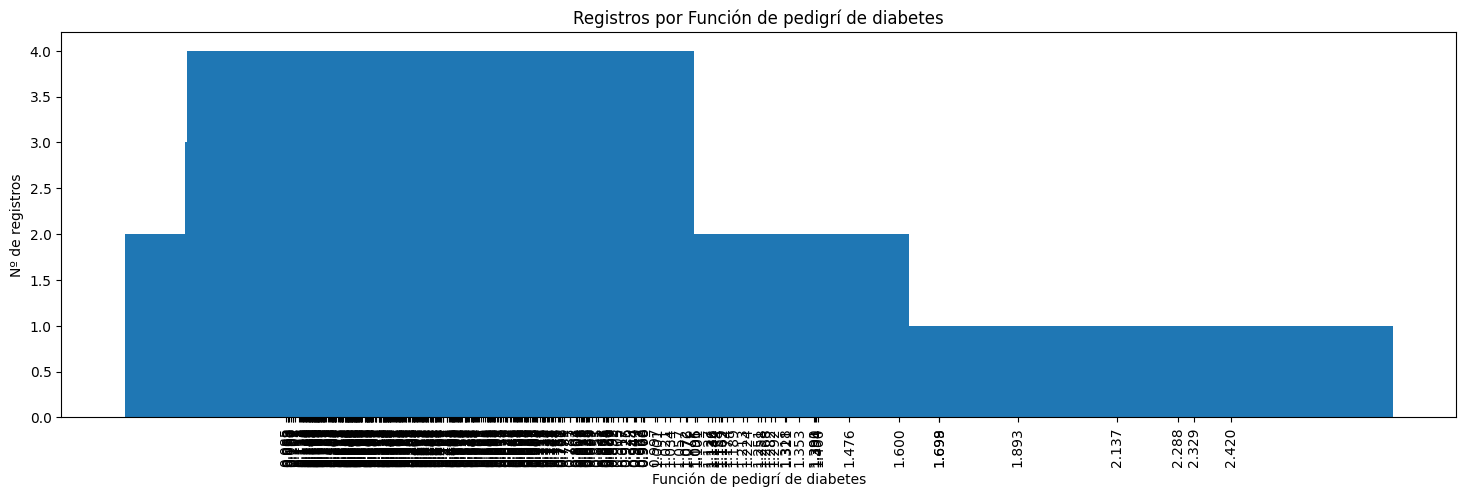

In [ ]:
labels, counts = np.unique(df['DiabetesPedigreeFunction'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Función de pedigrí de diabetes')
plt.xlabel('Función de pedigrí de diabetes')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

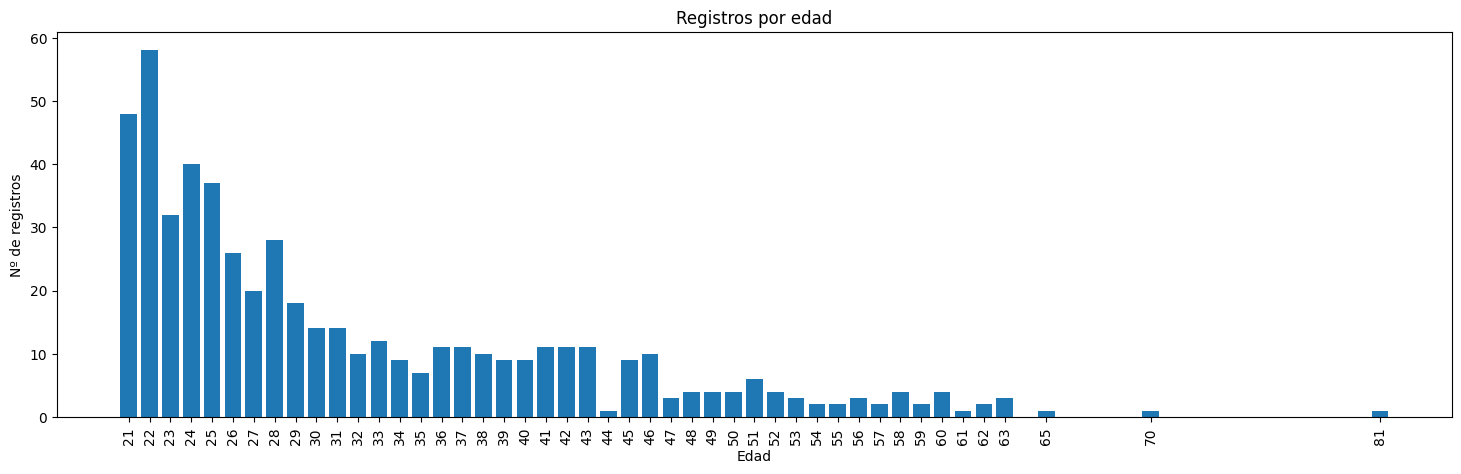

In [ ]:
labels, counts = np.unique(df['Age'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por edad')
plt.xlabel('Edad')
plt.ylabel('Nº de registros')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (18,5)
plt.show()

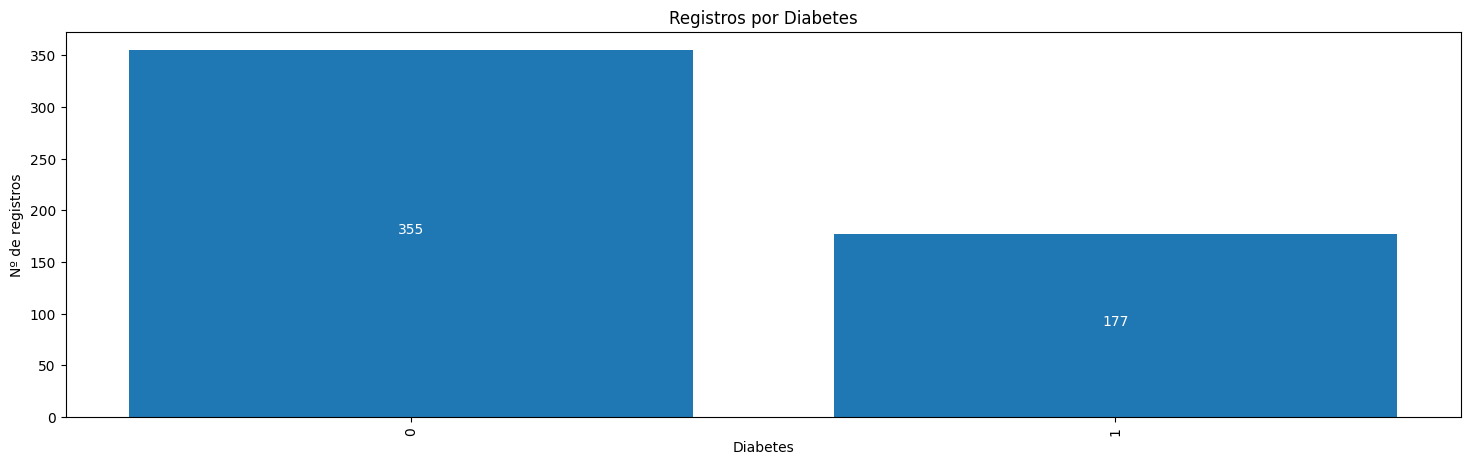

In [ ]:
labels, counts = np.unique(df['Outcome'], return_counts=True)
plt.bar(labels, counts, align='center')
plt.title('Registros por Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Nº de registros')
plt.text(1, counts[1]/2, counts[1], ha='center', color='white')
plt.text(0, counts[0]/2, counts[0], ha='center', color='white')
plt.gca().set_xticks(labels)
plt.xticks(fontsize=10)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

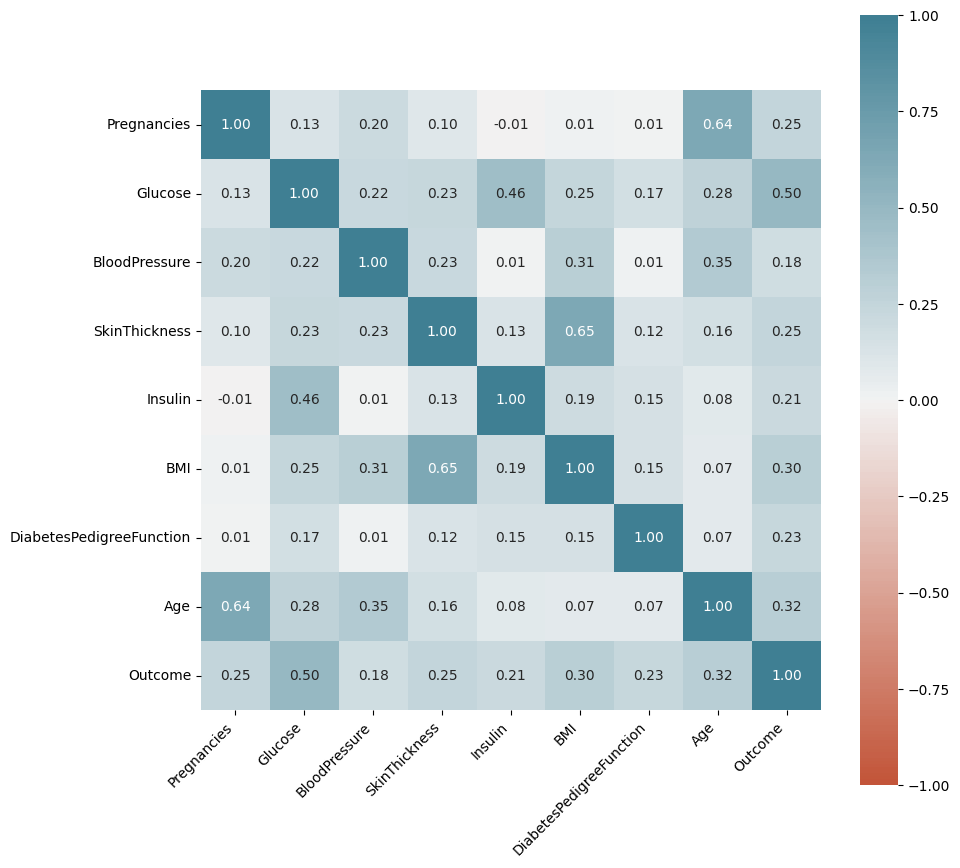

In [ ]:
# Calcula coeficiente de correlación de Pearson
corr = df.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

plt.figure(figsize=(10,10))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)

# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [ ]:
df = df.drop(columns=['Pregnancies', 'SkinThickness'])

[Text(0.5, 0, 'Glucose'),
 Text(1.5, 0, 'BloodPressure'),
 Text(2.5, 0, 'Insulin'),
 Text(3.5, 0, 'BMI'),
 Text(4.5, 0, 'DiabetesPedigreeFunction'),
 Text(5.5, 0, 'Age'),
 Text(6.5, 0, 'Outcome')]

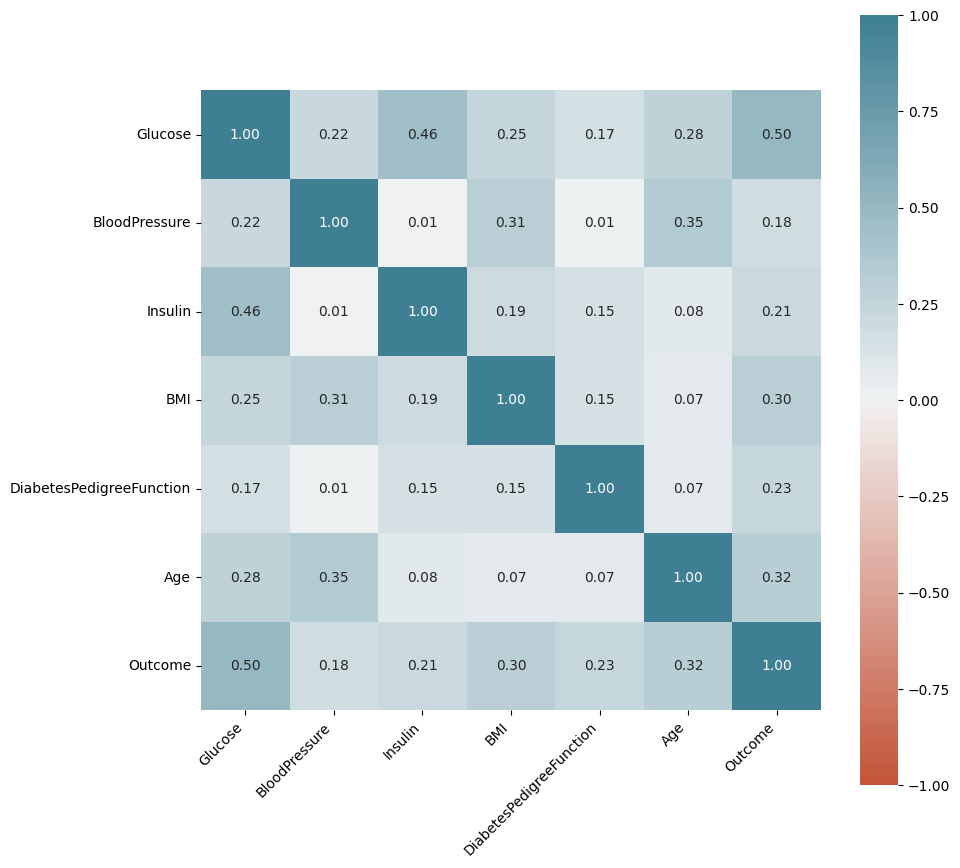

In [ ]:
# Calcula coeficiente de correlación de Pearson
corr = df.corr(method ='pearson') #por defecto Pearson ¿existe relación lineal entre variables?

plt.figure(figsize=(10,10))
ax = sns.heatmap(
 corr,
 vmin=-1, vmax=1, center=0,
 cmap=sns.diverging_palette(20, 220, n=200),
 square=True, annot=True, fmt=".2f"
)

# Rota las etiquetas del eje horizontal
ax.set_xticklabels(
 ax.get_xticklabels(),
 rotation=45,
 horizontalalignment='right'
)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   532 non-null    int64  
 1   BloodPressure             532 non-null    int64  
 2   Insulin                   532 non-null    int64  
 3   BMI                       532 non-null    float64
 4   DiabetesPedigreeFunction  532 non-null    float64
 5   Age                       532 non-null    int64  
 6   Outcome                   532 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 33.2 KB


In [ ]:
df['Outcome'].value_counts()

0    355
1    177
Name: Outcome, dtype: int64

No hay valores nulos

# NORMALIZACIÓN DE VARIABLES

In [ ]:
df=df.reset_index(drop=True)

In [ ]:
mm = StandardScaler()
df_scaler = mm.fit_transform(df)
scaler_df = pd.DataFrame(df_scaler, index=df.index, columns=df.columns)
scaler_df = scaler_df.drop(columns=['Outcome'])
scaler_df

,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.870838,0.040196,-0.935690,0.103245,0.360331,1.710031
1,-1.163383,-0.447661,-0.935690,-0.914990,-0.441477,-0.057170
2,-1.034227,-0.447661,-0.170790,-0.696797,-0.976015,-0.987276
3,0.515657,-2.561709,0.431365,1.485136,5.185701,0.128851
4,-1.389408,-1.748614,-0.219614,-0.274956,-0.740702,-0.522223
...,...,...,...,...,...,...
527,1.581201,0.202815,-0.935690,1.616052,-0.290412,1.058957
528,-0.646756,0.365434,0.529012,0.001422,-0.964395,2.919169
529,0.031318,-0.122423,-0.935690,0.568724,-0.473433,-0.429212
530,-0.000971,0.040196,-0.024320,-0.973175,-0.749417,-0.150181


In [ ]:
X = scaler_df.copy()
y = df.Outcome

In [ ]:
print(len(X))
print(len(y))

532
532


In [ ]:
smoteenn = SMOTEENN(random_state=2)
X_resampled, y_resampled = smoteenn.fit_resample(X, y)

In [ ]:
print(len(X_resampled))
print(len(y_resampled))

418
418


In [ ]:
#from imblearn.over_sampling import RandomOverSampler

#oversample = RandomOverSampler(sampling_strategy='minority')
#X, y = oversample.fit_resample(X, y)

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=1)

In [ ]:
print(len(X_train_1))
print(len(X_test_1))

292
126


## DEFINICIÓN DE LA FUNCIÓN PARA CREAR GRÁFICOS DINÁMICOS

In [ ]:
def goplot(df):
  fig = go.Figure()
  fig.update_layout(autosize=False,width=1500,height=500,margin=dict(l=10,r=10,b=10,t=10,pad=4))
  for column in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[column], name=column))
  fig.update_layout(showlegend = True)
  fig.show()

# Regresión Logistica

In [ ]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_1, y_train_1)

# Evaluate the model on the testing set
accuracy = log_reg.score(X_test_1, y_test_1)



print('Logistic Regression Accuracy: {:.2f}%'.format(accuracy * 100))

Logistic Regression Accuracy: 91.27%


In [ ]:
print('Training set score: {:.4f}'.format(log_reg.score(X_train_1, y_train_1)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test_1, y_test_1)))

Training set score: 0.9110
Test set score: 0.9127


In [ ]:
y_pred  =  log_reg.predict(X_test_1)

In [ ]:
mse = mean_squared_error(y_test_1, y_pred)

print('MSE: ', mse)
print()
print('Accuracy')
print('Training set score: {:.4f}'.format(log_reg.score(X_train_1, y_train_1)))
print('Test set score: {:.4f}'.format(log_reg.score(X_test_1, y_test_1)))
print()
print('R-squared')
print("R-squared test:", r2_score(y_test_1, log_reg.predict(X_test_1)))
print("R-squared train:", r2_score(y_train_1, log_reg.predict(X_train_1)))

MSE:  0.0873015873015873

Accuracy
Training set score: 0.9110
Test set score: 0.9127

R-squared
R-squared test: 0.6298076923076921
R-squared train: 0.642763034067382


In [ ]:
clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        48
           1       0.96      0.90      0.93        78

    accuracy                           0.91       126
   macro avg       0.90      0.92      0.91       126
weighted avg       0.92      0.91      0.91       126



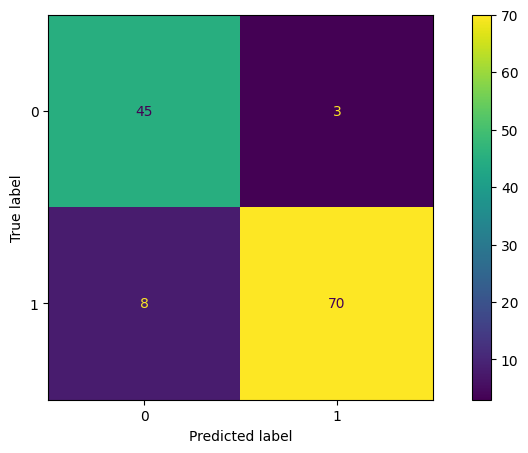

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

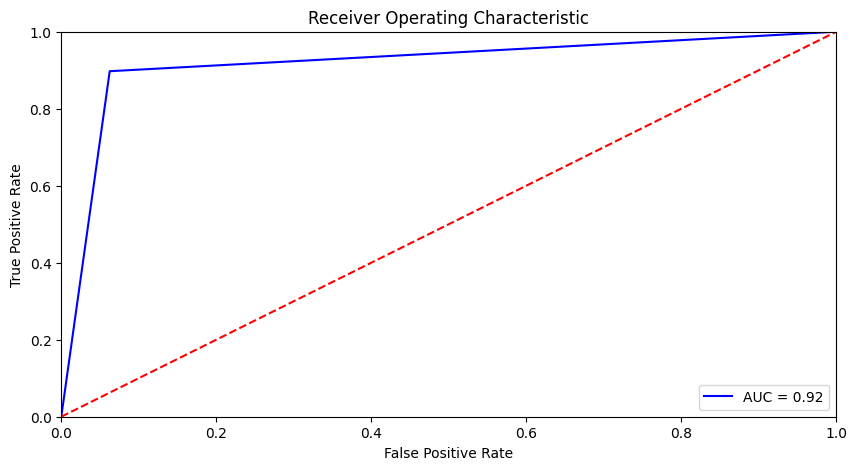

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

In [ ]:
scores = cross_val_score(log_reg, X_train_1, y_train_1, cv=5)
print("Puntuaciones de validación cruzada: ", scores)
print("Puntuación media de validación cruzada: {:.2f}".format(scores.mean()))


Puntuaciones de validación cruzada:  [0.91525424 0.84745763 0.9137931  0.9137931  0.93103448]
Puntuación media de validación cruzada: 0.90


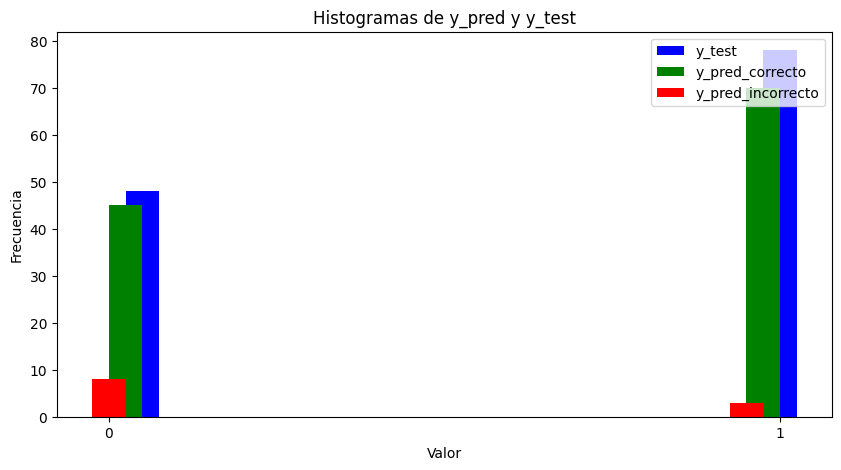

In [ ]:
# Crear los arreglos booleanos
correcto = (y_test_1 == y_pred)
incorrecto = (y_test_1 != y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, y_pred)
y_pred_incorrecto = np.extract(incorrecto, y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = log_reg.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0
#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

In [ ]:
goplot(df_g[['y_test','y_pred','y_prob']])

# SVC GRIDSEARCH

In [ ]:
model = SVC(kernel='rbf', probability=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [1, 2, 3, 4, 5, 8, 10, 12, 15, 20, 25, 30, 35, 40],
    'gamma': ['scale', 'auto', 1, 2, 3, 4, 5],
}

In [ ]:
grid = GridSearchCV(model, param_grid, n_jobs= -1, cv=5)
grid.fit(X_train_1, y_train_1)

print('Los parámetros que dan una predicción óptima son: ' ,grid.best_params_)

Los parámetros que dan una predicción óptima son:  {'C': 20, 'gamma': 'auto'}


In [ ]:
print('Training set score: {:.4f}'.format(grid.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(grid.score(X_test_1, y_test_1)))
y_pred  =  grid.predict(X_test_1)

Training set score: 0.9863
Test set score: 0.9603


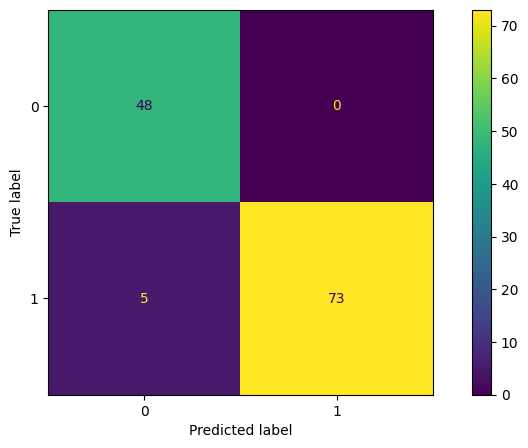

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        48
           1       1.00      0.94      0.97        78

    accuracy                           0.96       126
   macro avg       0.95      0.97      0.96       126
weighted avg       0.96      0.96      0.96       126



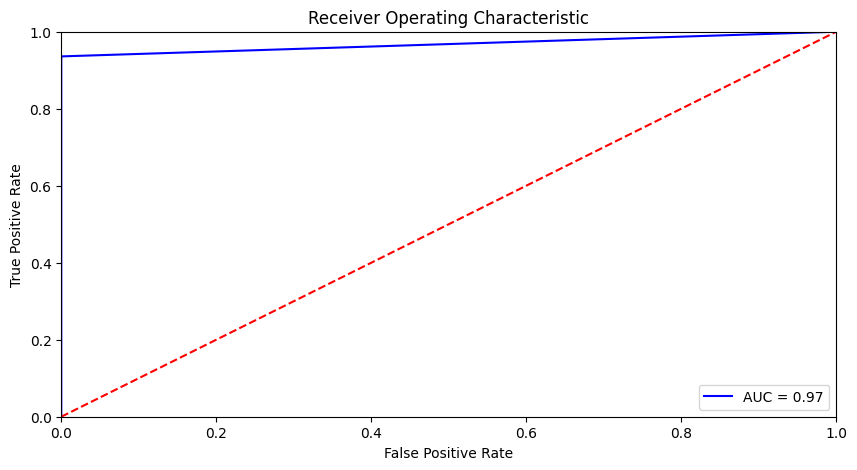

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

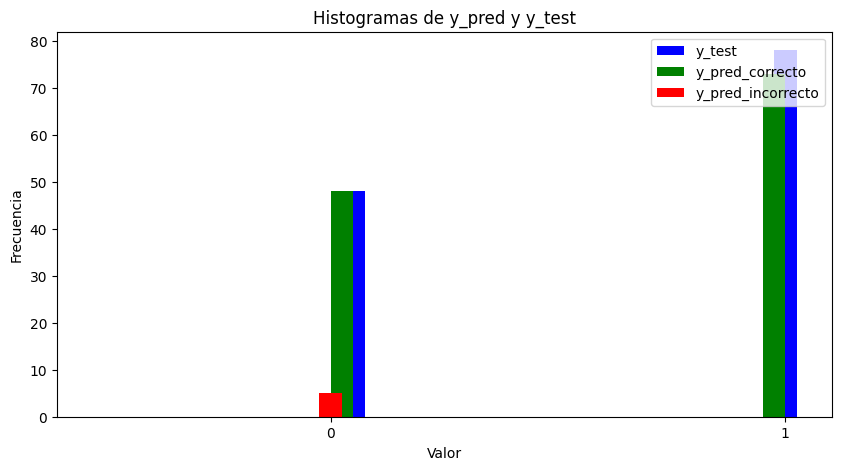

In [ ]:
# Crear los arreglos booleanos
correcto = (y_test_1 == y_pred)
incorrecto = (y_test_1 != y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, y_pred)
y_pred_incorrecto = np.extract(incorrecto, y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = grid.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.3] = 0

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

In [ ]:
goplot(df_g[['y_test','y_pred','y_prob']])

# XGBOOST 1

Accuracy de XGBoost:  0.9523809523809523
Accuracy de Regresion Lineal:  0.6133996151453593
Training set score: 0.9966
Test set score: 0.9524
              precision    recall  f1-score   support

           0       0.90      0.98      0.94        48
           1       0.99      0.94      0.96        78

    accuracy                           0.95       126
   macro avg       0.95      0.96      0.95       126
weighted avg       0.96      0.95      0.95       126



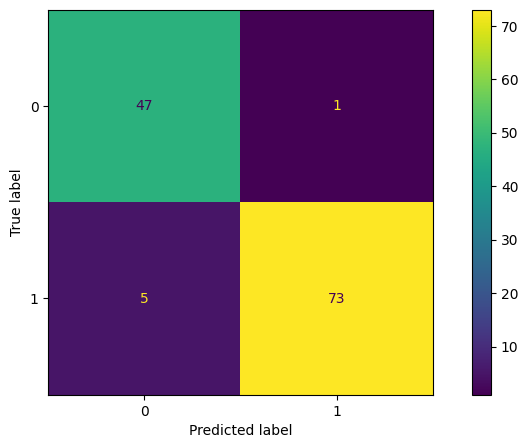

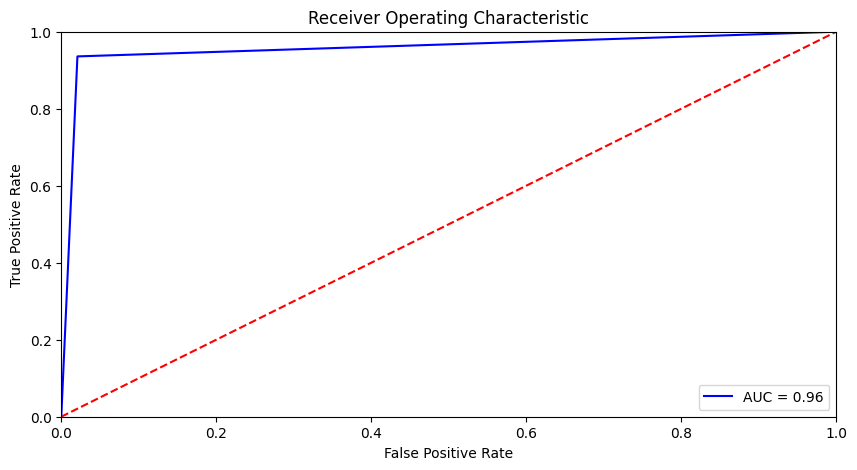

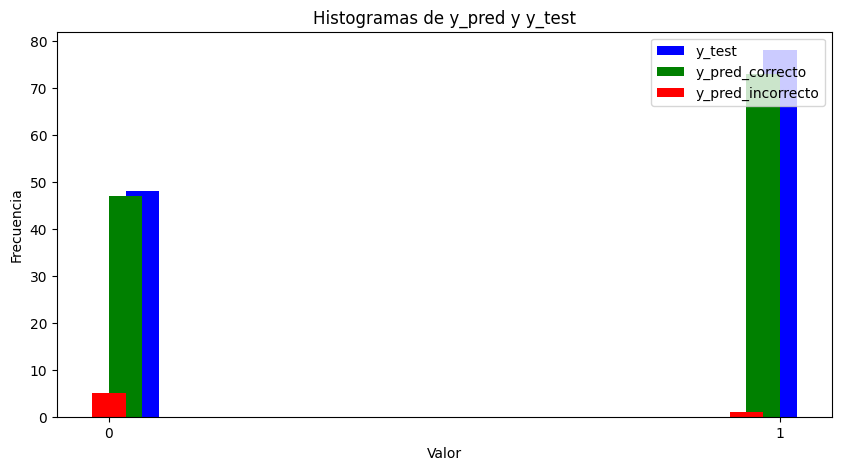

In [ ]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10,
                            seed=123)
clf_xgb.fit(X_train_1, y_train_1)
preds_xgb = clf_xgb.predict(X_test_1)

clf_lr = LR().fit(X_train_1, y_train_1)

accuracy_xgb = float(np.sum(preds_xgb == y_test_1))/y_test_1.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)

accuracy_lr = clf_lr.score(X_test_1, y_test_1)
print('Accuracy de Regresion Lineal: ', accuracy_lr)

print('Training set score: {:.4f}'.format(clf_xgb.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(clf_xgb.score(X_test_1, y_test_1)))

clas_report=classification_report(y_test_1, preds_xgb)
print(clas_report)


confusion_matrix = metrics.confusion_matrix(y_test_1, preds_xgb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()


# Crear los arreglos booleanos
correcto = (y_test_1 == preds_xgb)
incorrecto = (y_test_1 != preds_xgb)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, preds_xgb)
y_pred_incorrecto = np.extract(incorrecto, preds_xgb)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = clf_xgb.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': preds_xgb, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

# XGBOOST RANDOM SEARCH (XGBOOST 2)

Accuracy de XGBoost:  0.9920634920634921
Training set score: 1.0000
Test set score: 0.9984
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



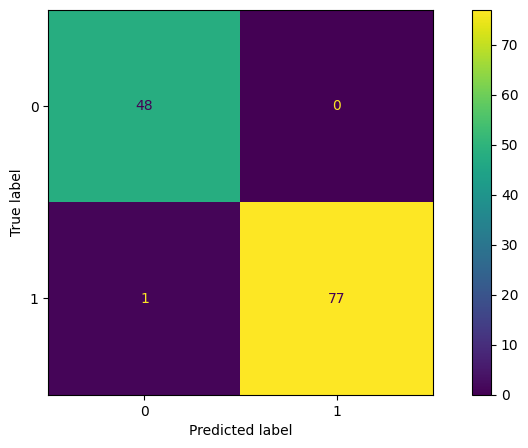

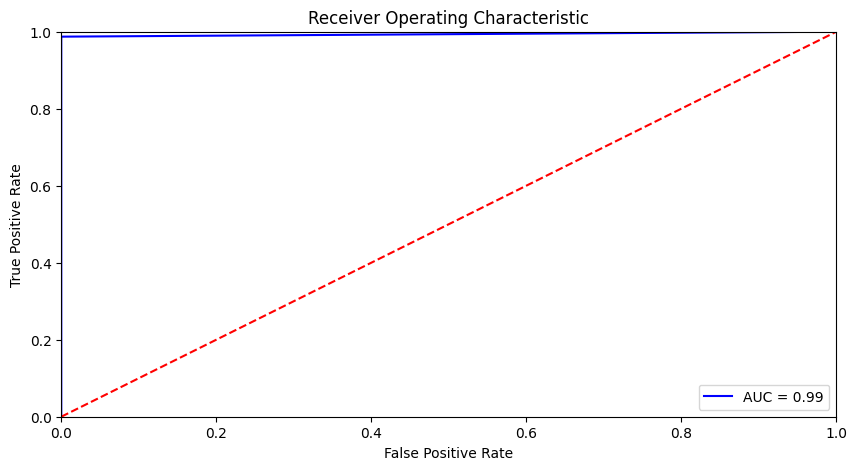

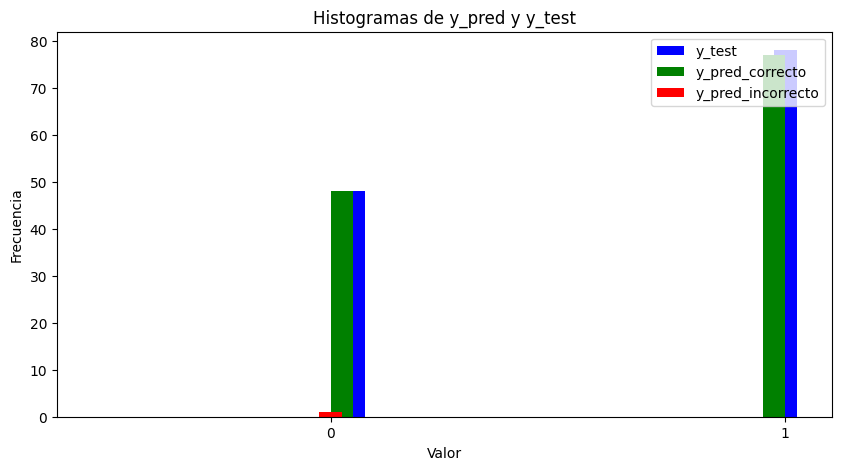

In [ ]:
params = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'max_depth': np.arange(3, 10, 1),
    'n_estimators': np.arange(100, 1000, 100),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.0, 1.0, 0.1),
    'reg_lambda': np.arange(0.0, 1.0, 0.1),
    'gamma': np.arange(0.0, 5, 0.2),
    'min_child_weight': np.arange(1, 10, 2),
    'scale_pos_weight': np.arange(0.5, 5, 0.5)
}

# Crear un objeto XGBoost Classifier
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=123)

# Crear un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf_xgb, param_distributions=params, n_iter=100, cv=5, scoring='roc_auc', random_state=42)

random_search.fit(X_train_1, y_train_1)
preds_xgb = random_search.predict(X_test_1)


accuracy_xgb = float(np.sum(preds_xgb == y_test_1))/y_test_1.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)

print('Training set score: {:.4f}'.format(random_search.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(random_search.score(X_test_1, y_test_1)))


clas_report=classification_report(y_test_1, preds_xgb)
print(clas_report)


confusion_matrix = metrics.confusion_matrix(y_test_1, preds_xgb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()


fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()


# Crear los arreglos booleanos
correcto = (y_test_1 == preds_xgb)
incorrecto = (y_test_1 != preds_xgb)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, preds_xgb)
y_pred_incorrecto = np.extract(incorrecto, preds_xgb)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = random_search.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0

clas_report=classification_report(y_test_1, preds_xgb)
print(clas_report)

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': preds_xgb, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



In [ ]:
# Guarda el modelo utilizando joblib
joblib.dump(model, 'modelo_xgboost.pkl')

# DECITION TREE

Accuracy: 0.9285714285714286
Training set score: 1.0000
Test set score: 0.9286
              precision    recall  f1-score   support

           0       0.90      0.92      0.91        48
           1       0.95      0.94      0.94        78

    accuracy                           0.93       126
   macro avg       0.92      0.93      0.92       126
weighted avg       0.93      0.93      0.93       126



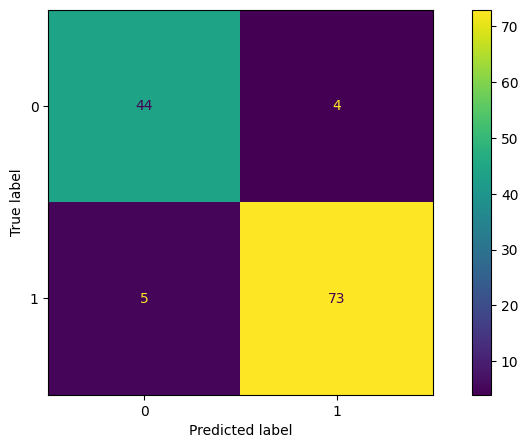

              precision    recall  f1-score   support

           0       0.90      0.92      0.91        48
           1       0.95      0.94      0.94        78

    accuracy                           0.93       126
   macro avg       0.92      0.93      0.92       126
weighted avg       0.93      0.93      0.93       126



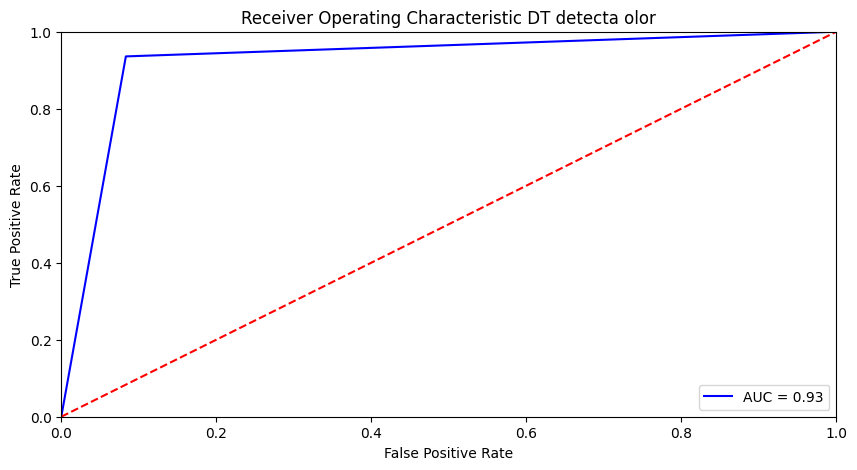

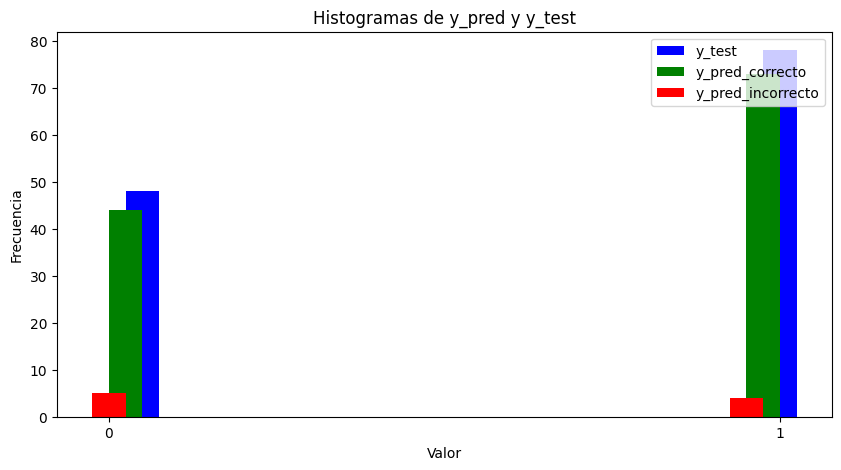

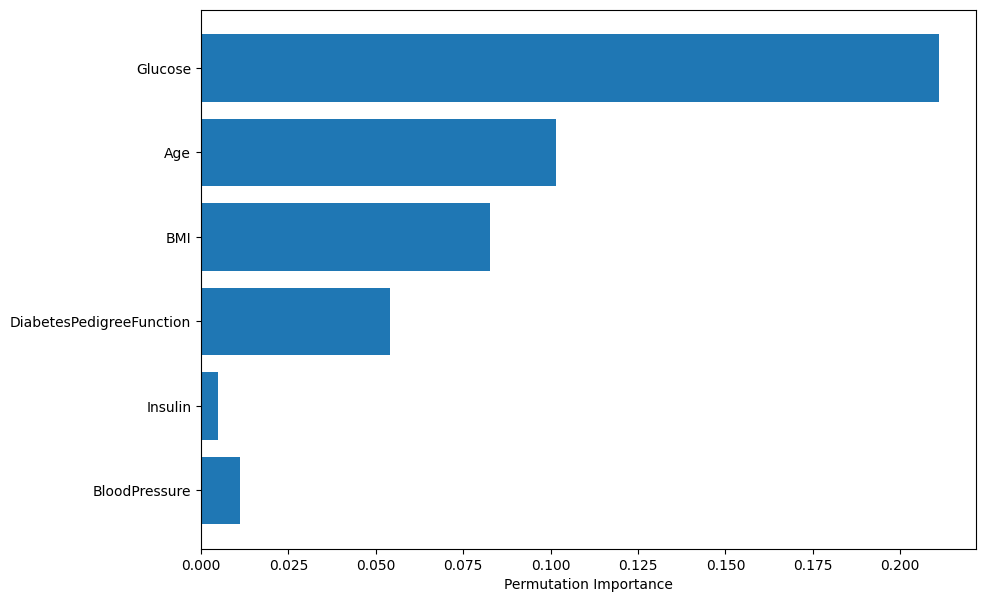

In [ ]:
# Creamos el objeto DTC
clf = DecisionTreeClassifier(criterion="entropy", max_depth=200)

# Entrenamos el modelo
clf = clf.fit(X_train_1,y_train_1)

# Realizamos predicciones
y_pred = clf.predict(X_test_1)
print("Accuracy:", metrics.accuracy_score(y_test_1, y_pred))


# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(clf.score(X_test_1, y_test_1)))


clas_report=classification_report(y_test_1, y_pred)
print(clas_report)


confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

clas_report=classification_report(y_test_1, y_pred)
print(clas_report)


fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()



# Crear los arreglos booleanos
correcto = (y_test_1 == y_pred)
incorrecto = (y_test_1 != y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, y_pred)
y_pred_incorrecto = np.extract(incorrecto, y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()


sorted_idx = clf.feature_importances_.argsort()
perm_importance = permutation_importance(clf, X_test_1, y_test_1)
plt.figure(figsize=(10,7))
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.show()

In [ ]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names= X.columns,class_names=['0','1'])
graph = graphviz.Source(dot_data)
image_path = '/content/drive/MyDrive/Colab Notebooks/TFM/decision_tree'
graph.render(image_path, format='png')

'/content/drive/MyDrive/Colab Notebooks/TFM/decision_tree.png'

# NN

Training set score: 0.9897
Test set score: 0.9683
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.95      0.97        78

    accuracy                           0.97       126
   macro avg       0.96      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



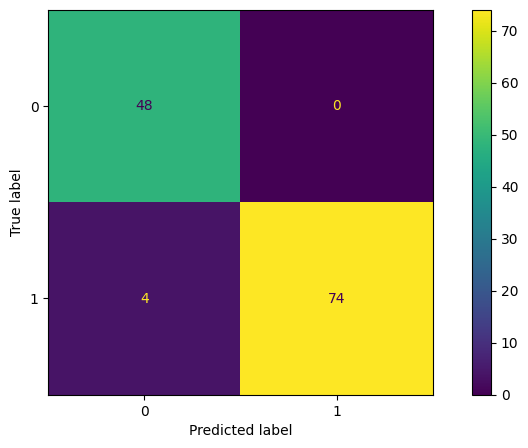

In [ ]:
#Initializing the MLPClassifier
classifier = MLPClassifier(max_iter=5000)

classifier.fit(X_train_1, y_train_1)

#Predicción sobre las instancias de prueba
y_pred = classifier.predict(X_test_1)

print('Training set score: {:.4f}'.format(classifier.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(classifier.score(X_test_1, y_test_1)))

clas_report=classification_report(y_test_1, y_pred)
print(clas_report)


confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

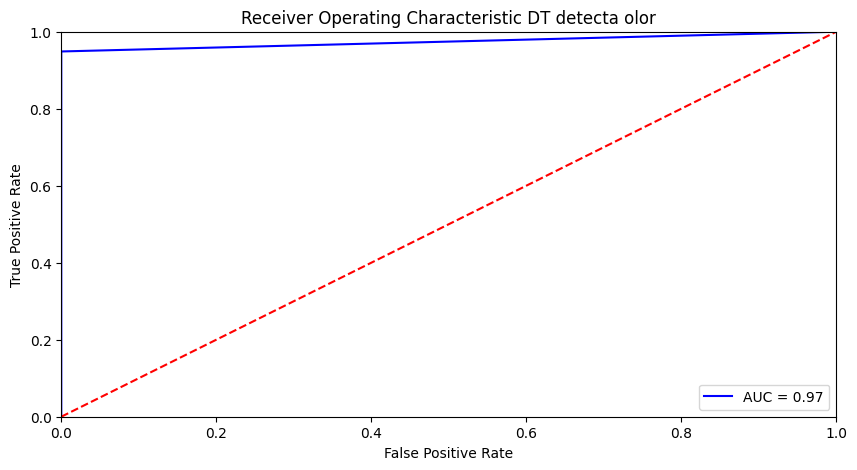

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

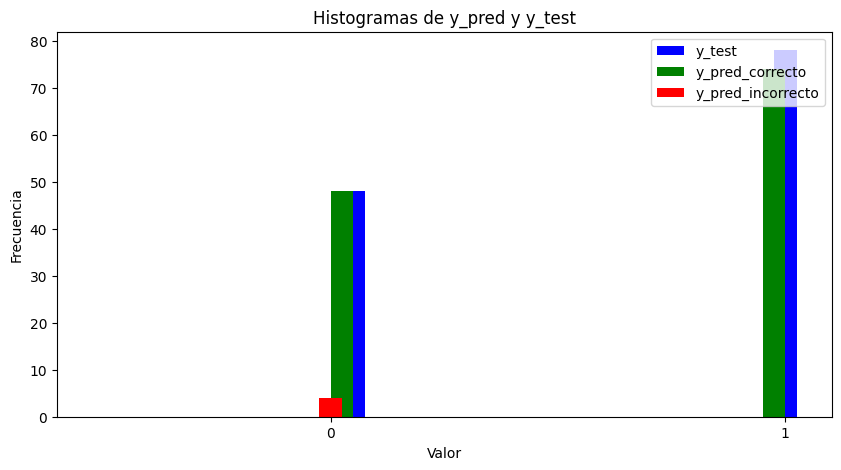

In [ ]:
# Crear los arreglos booleanos
correcto = (y_test_1 == y_pred)
incorrecto = (y_test_1 != y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, y_pred)
y_pred_incorrecto = np.extract(incorrecto, y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = classifier.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

# DNN

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(6,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_1, y_train_1, epochs=50, batch_size=32, validation_data=(X_test_1, y_test_1))


y_pred = (model.predict(X_test_1) > 0.3).astype("int32")
print("Accuracy_test:", accuracy_score(y_test_1, y_pred))

Epoch 1/50
10/10 [==============================] - 1s 26ms/step - loss: 0.6020 - accuracy: 0.8014 - val_loss: 0.4383 - val_accuracy: 0.9365
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.3548 - accuracy: 0.9178 - val_loss: 0.2423 - val_accuracy: 0.9206
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.2357 - accuracy: 0.9110 - val_loss: 0.2111 - val_accuracy: 0.9127
Epoch 4/50
10/10 [==============================] - 0s 8ms/step - loss: 0.2003 - accuracy: 0.9212 - val_loss: 0.1701 - val_accuracy: 0.9365
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.1834 - accuracy: 0.9486 - val_loss: 0.1536 - val_accuracy: 0.9524
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1813 - accuracy: 0.9418 - val_loss: 0.2302 - val_accuracy: 0.9127
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.1708 - accuracy: 0.9418 - val_loss: 0.1439 - val_accuracy: 0.9524
Epoch 8/50
10/10 [=

In [ ]:
clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



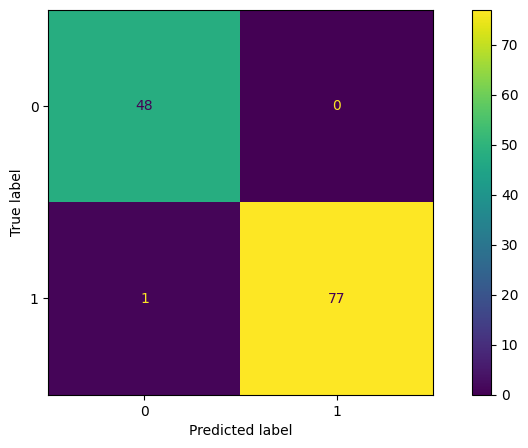

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

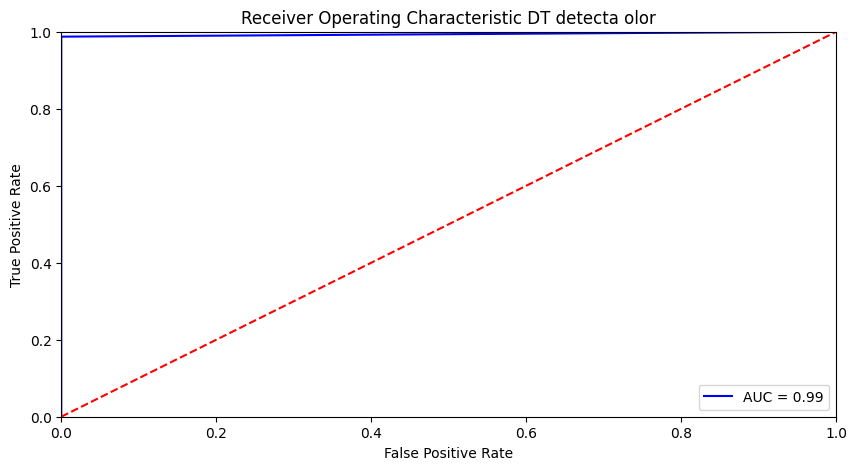

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

In [ ]:
f=pd.DataFrame(y_pred, columns=['y_pred'])
y_test_1=y_test_1.reset_index(drop=True)
f['y_test']=y_test_1
f

,y_pred,y_test
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
121,1,1
122,1,1
123,1,1
124,1,1


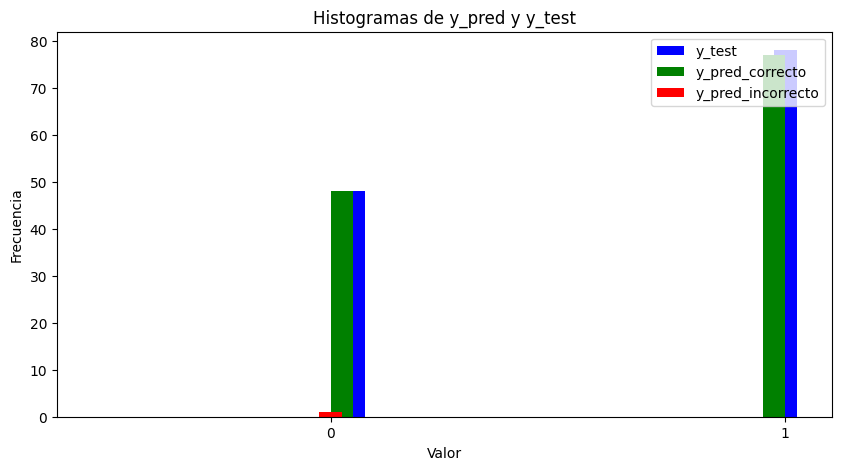

In [ ]:
# Crear los arreglos booleanos
correcto = (f.y_test == f.y_pred)
incorrecto = (f.y_test != f.y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, f.y_pred)
y_pred_incorrecto = np.extract(incorrecto, f.y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

# RF

In [ ]:
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 2000, random_state = 1)

# Train the model on training data
#rf.fit(train_features, train_labels);
rf.fit(X_train_1, y_train_1);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test_1)

# Calculate the absolute errors
errors = abs(predictions - y_test_1)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.06 degrees.


In [ ]:
print('Training set score: {:.4f}'.format(rf.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(rf.score(X_test_1, y_test_1)))


clas_report=classification_report(y_test_1, predictions)
print(clas_report)

Training set score: 1.0000
Test set score: 0.9444
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.99      0.92      0.95        78

    accuracy                           0.94       126
   macro avg       0.94      0.95      0.94       126
weighted avg       0.95      0.94      0.94       126



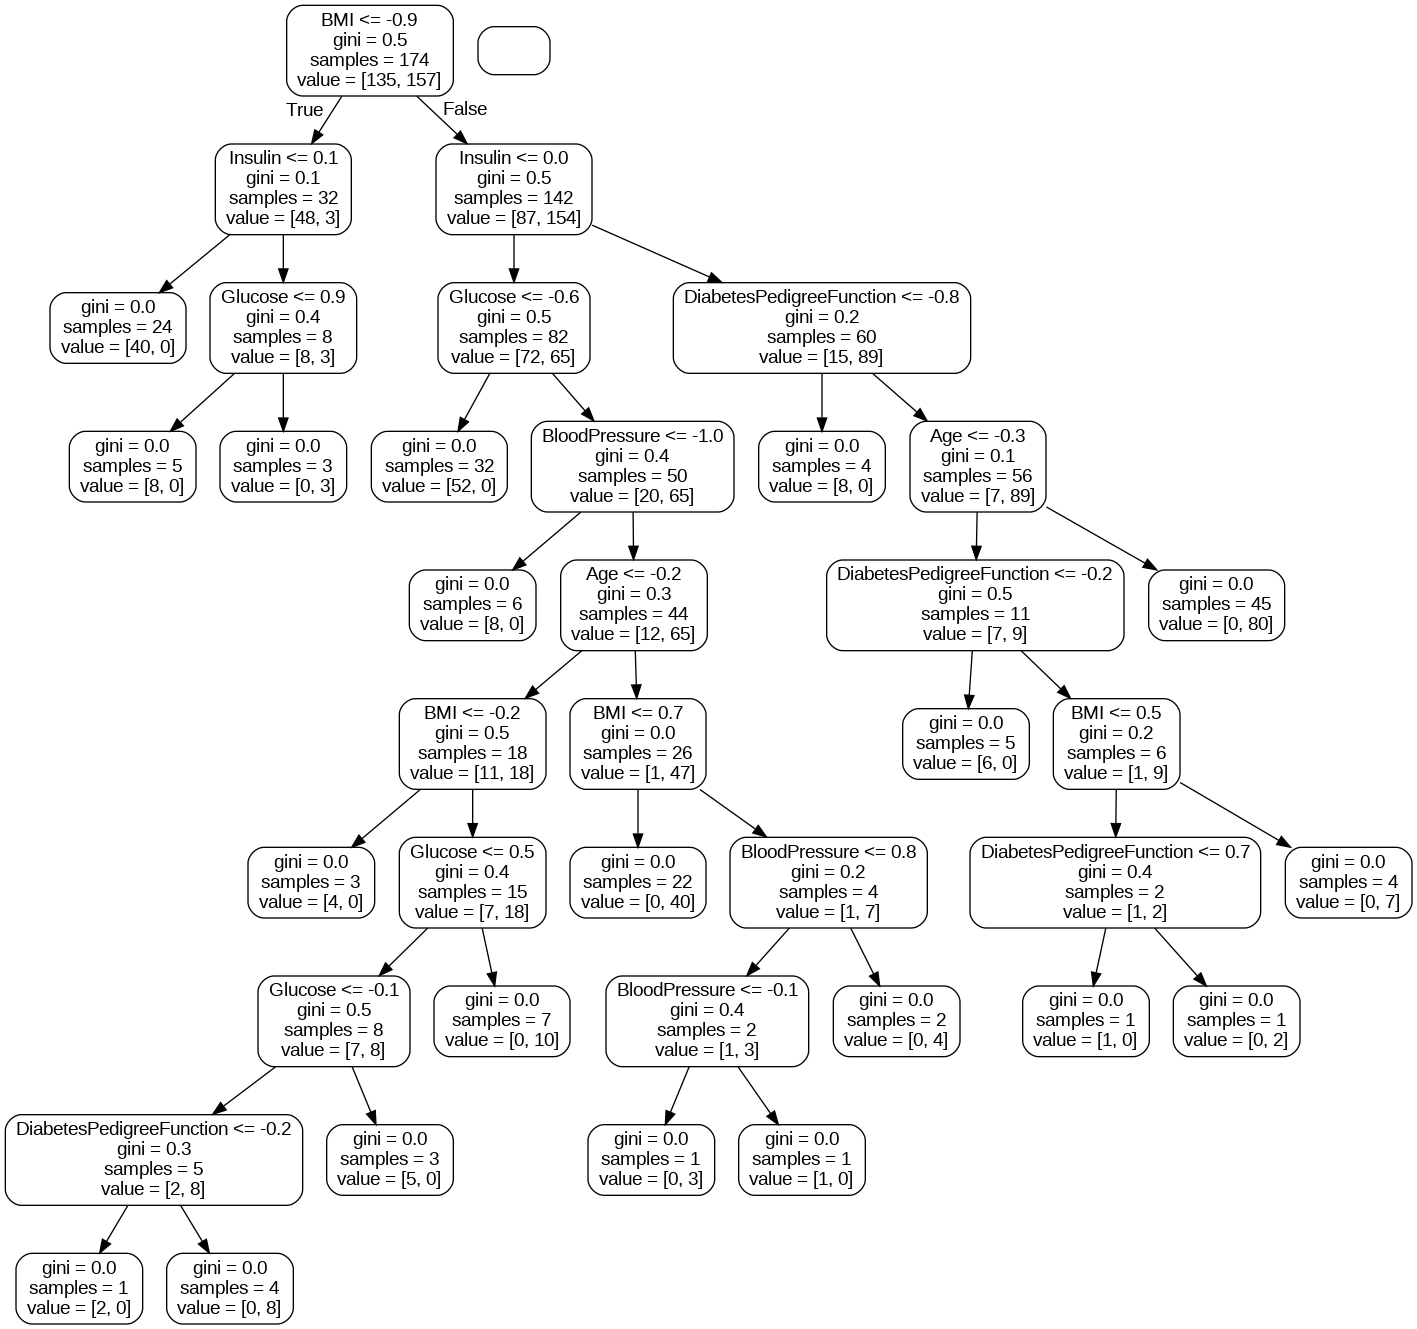

In [ ]:
tree = rf.estimators_[5]
export_graphviz(tree, out_file = 'RF_1.dot', feature_names = X.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('RF_1.dot')
graph.write_png('RF_1.png')
Image(graph.create_png())

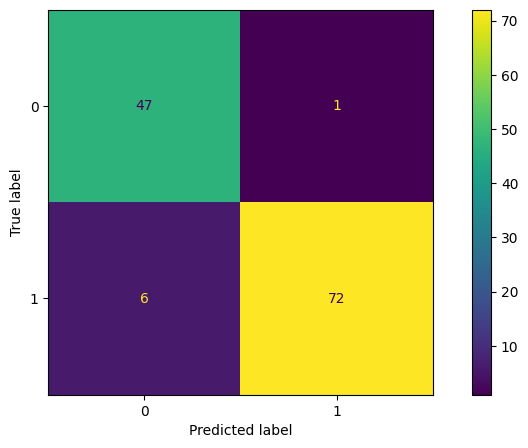

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

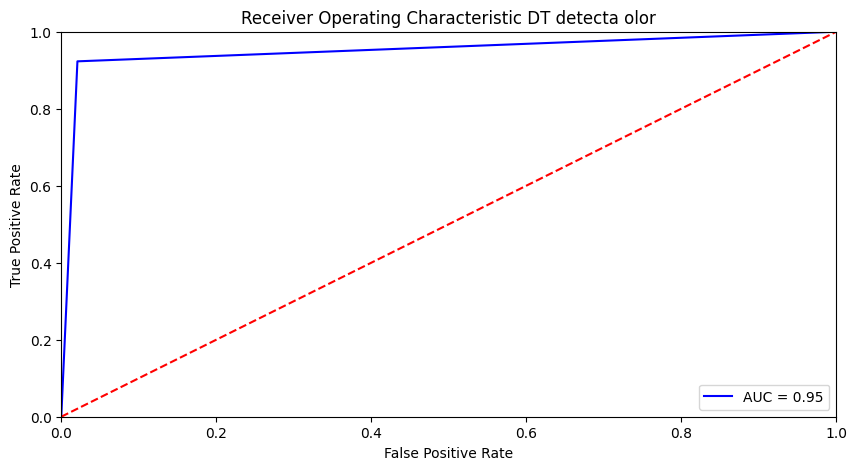

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, predictions)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

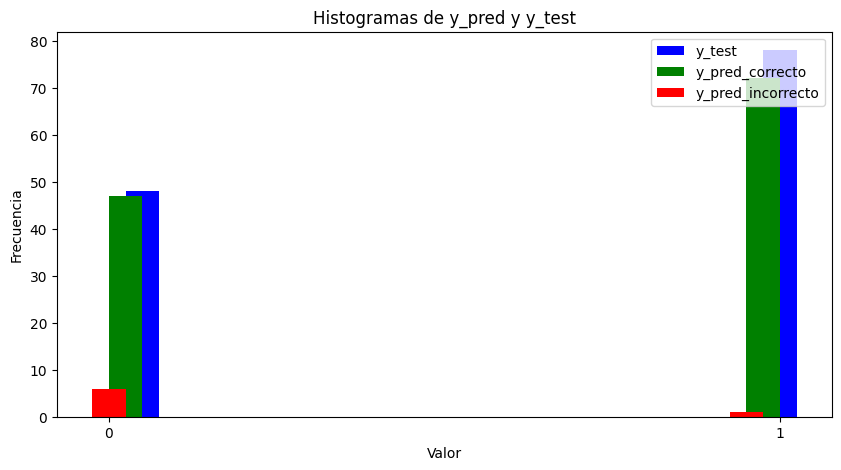

In [ ]:
# Crear los arreglos booleanos
correcto = (y_test_1 == predictions)
incorrecto = (y_test_1 != predictions)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, predictions)
y_pred_incorrecto = np.extract(incorrecto, predictions)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

Text(0.5, 0, 'Permutation Importance')

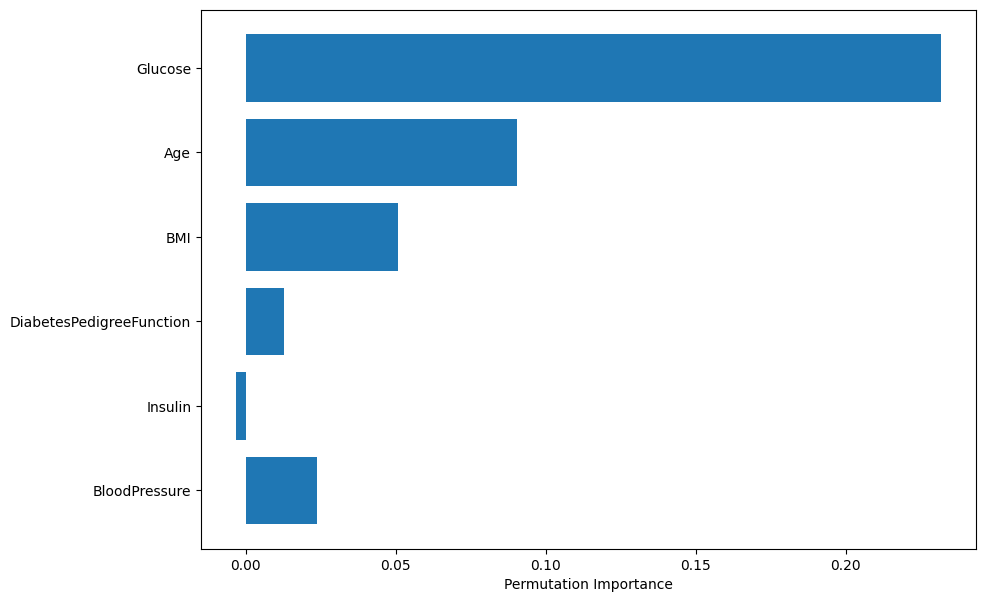

In [ ]:
sorted_idx = rf.feature_importances_.argsort()

perm_importance = permutation_importance(rf, X_test_1, y_test_1)

plt.figure(figsize=(10,7))

plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

plt.xlabel("Permutation Importance")

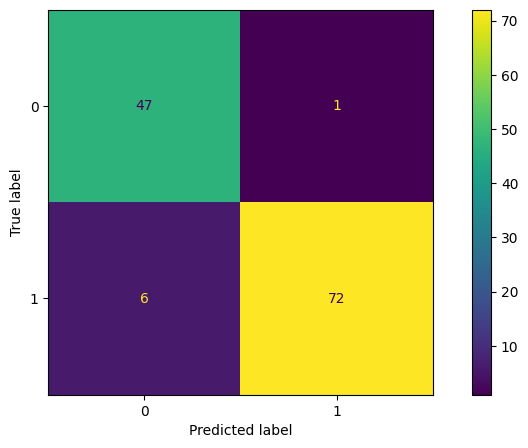

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = rf.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0

#y_pred = np.where(y_prob > 0.6, 1, 0)

confusion_matrix = metrics.confusion_matrix(y_test_1, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': predictions, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

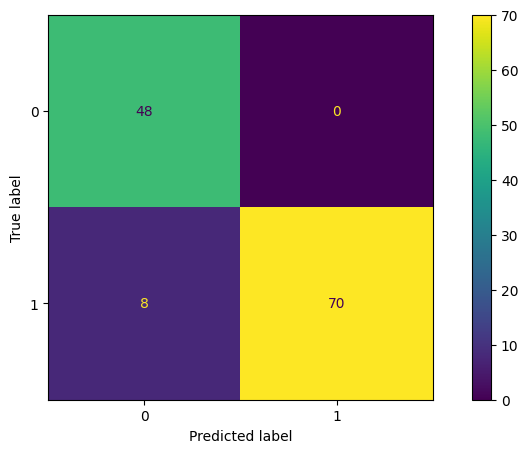

In [ ]:
y_pred = np.where(y_prob > 0.6, 1, 0)

confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

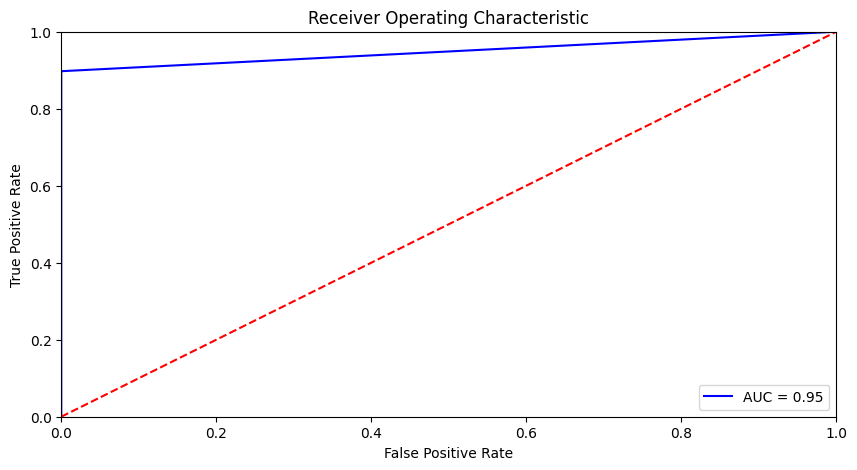

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

In [ ]:
clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        48
           1       1.00      0.90      0.95        78

    accuracy                           0.94       126
   macro avg       0.93      0.95      0.93       126
weighted avg       0.95      0.94      0.94       126



# RF CON RANDOMSEARCH

In [ ]:
# Define the hyperparameters to tune
param_dist = {
    'n_estimators': [50, 100, 200, 400],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None] + list(np.arange(2, 20, 2)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train a random forest classifier using RandomizedSearchCV
random_search = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train_1, y_train_1)

# Get the best hyperparameters and train a final model
best_params = random_search.best_params_
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train_1, y_train_1)

# Evaluate the final model on the testing set
y_pred = final_model.predict(X_test_1)
accuracy = accuracy_score(y_test_1, y_pred)

print('Best params:', best_params)
print()
print('Random Forest Accuracy: {:.2f}%'.format(accuracy * 100))


Best params: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

Random Forest Accuracy: 94.44%


In [ ]:
print('Training set score: {:.4f}'.format(final_model.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(final_model.score(X_test_1, y_test_1)))

Training set score: 1.0000
Test set score: 0.9444


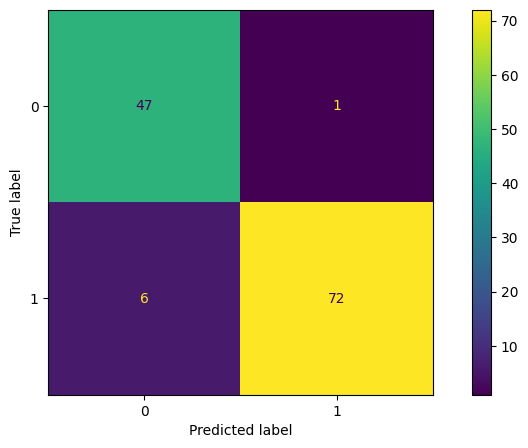

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.99      0.92      0.95        78

    accuracy                           0.94       126
   macro avg       0.94      0.95      0.94       126
weighted avg       0.95      0.94      0.94       126



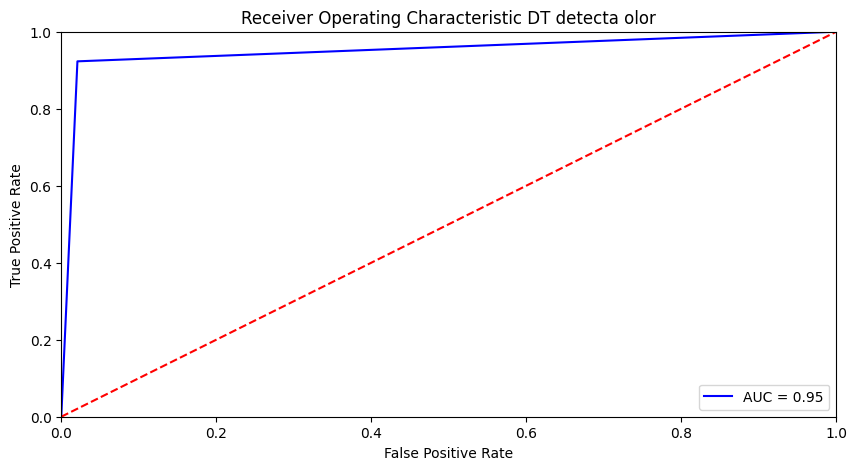

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

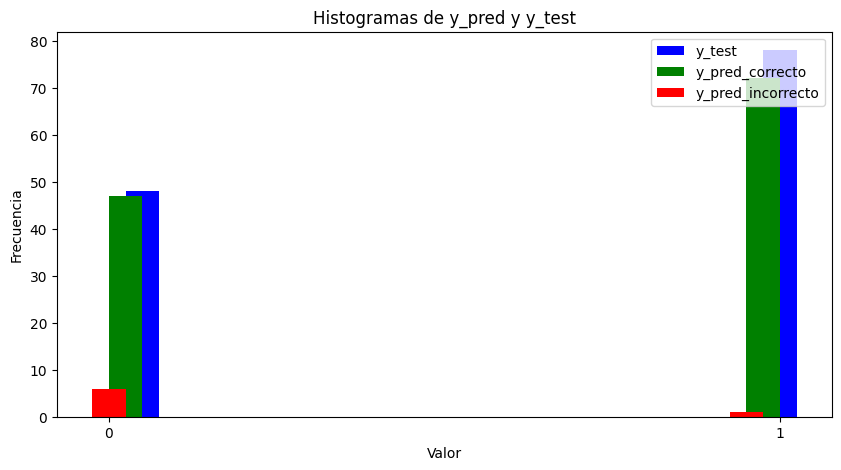

In [ ]:
# Crear los arreglos booleanos
correcto = (y_test_1 == y_pred)
incorrecto = (y_test_1 != y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, y_pred)
y_pred_incorrecto = np.extract(incorrecto, y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

Text(0.5, 0, 'Permutation Importance')

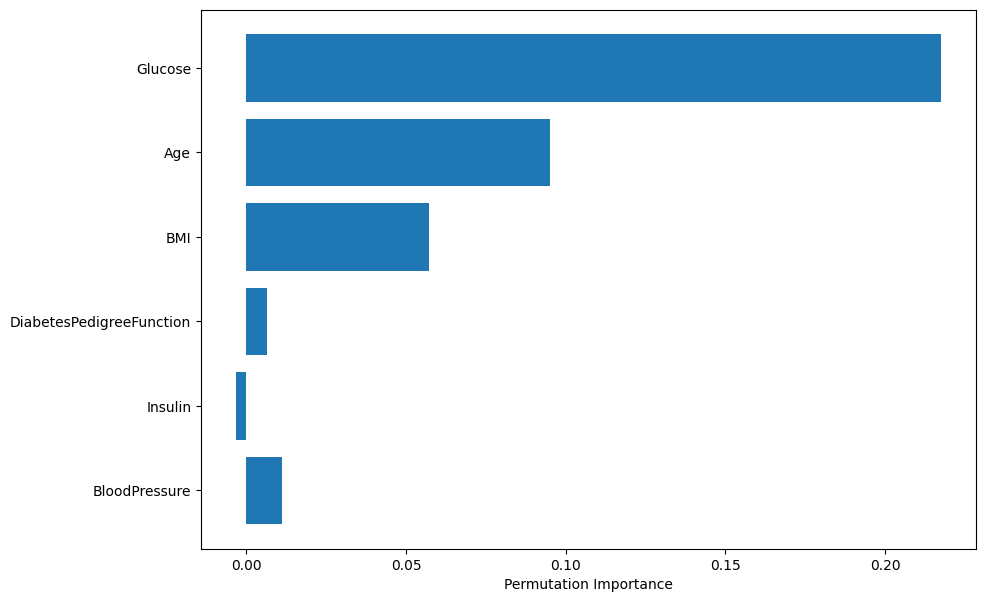

In [ ]:
sorted_idx = final_model.feature_importances_.argsort()

perm_importance = permutation_importance(final_model, X_test_1, y_test_1)

plt.figure(figsize=(10,7))

plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])

plt.xlabel("Permutation Importance")

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = final_model.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0

#y_pred = np.where(y_prob > 0.6, 1, 0)

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

In [ ]:

y_pred = np.where(y_prob > 0.6, 1, 0)

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

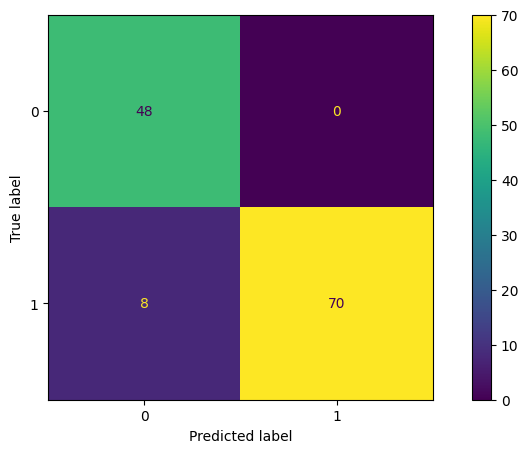

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        48
           1       1.00      0.90      0.95        78

    accuracy                           0.94       126
   macro avg       0.93      0.95      0.93       126
weighted avg       0.95      0.94      0.94       126



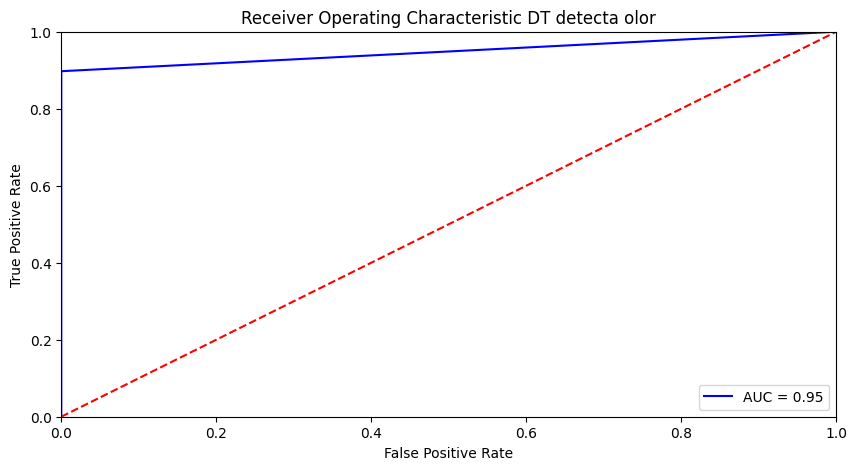

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

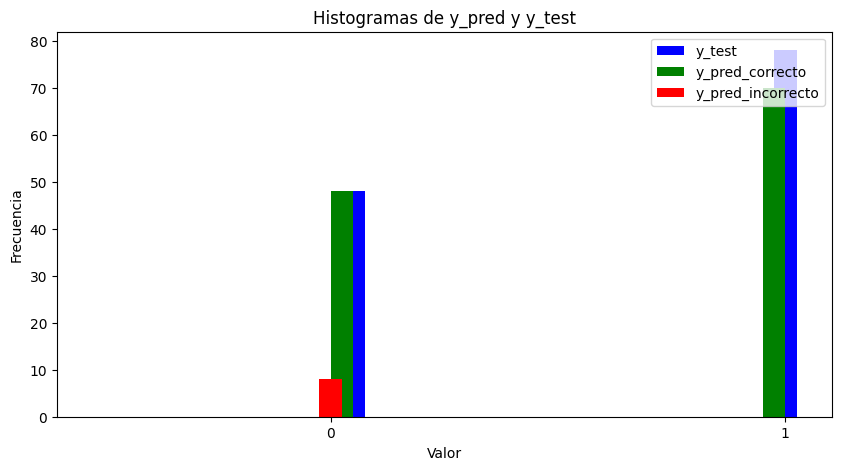

In [ ]:
# Crear los arreglos booleanos
correcto = (y_test_1 == y_pred)
incorrecto = (y_test_1 != y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, y_pred)
y_pred_incorrecto = np.extract(incorrecto, y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

# ADABOOST

In [ ]:
# Utilizando AdaBoost para aumentar la precisión
ada = AdaBoostClassifier(base_estimator=rf, n_estimators=1000,
                         learning_rate=0.02, random_state=42)
# Ajustando los datos
ada = ada.fit(X_train_1, y_train_1)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



In [ ]:
# Imprimir la precisión.
y_train_pred = ada.predict(X_train_1)
y_test_pred = ada.predict(X_test_1)

ada_train = accuracy_score(y_train_1, y_train_pred)
ada_test = accuracy_score(y_test_1, y_test_pred)
print('Precisión modelo con AdaBoost train/test  {0:.3f}/{1:.3f}'
      .format(ada_train, ada_test))

Precisión modelo con AdaBoost train/test  1.000/0.944


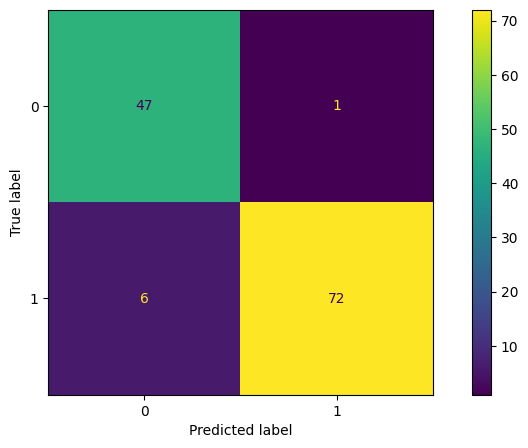

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
clas_report=classification_report(y_test_1, y_test_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        48
           1       0.99      0.92      0.95        78

    accuracy                           0.94       126
   macro avg       0.94      0.95      0.94       126
weighted avg       0.95      0.94      0.94       126



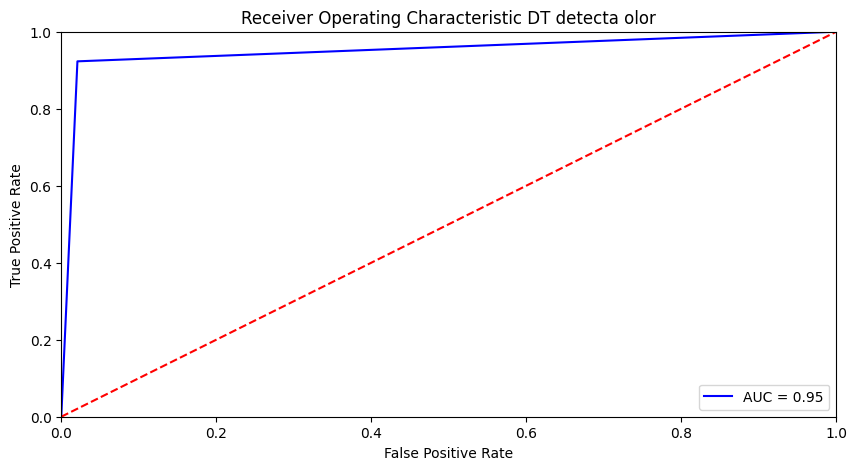

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_test_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

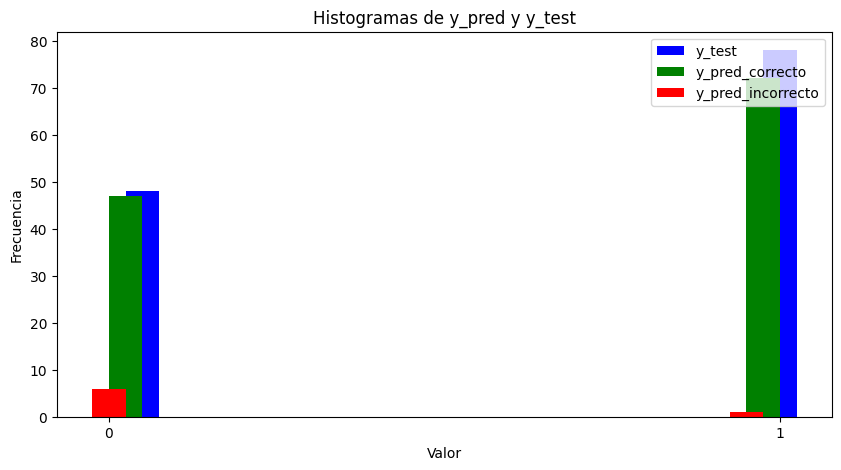

In [ ]:
# Crear los arreglos booleanos
correcto = (y_test_1 == y_test_pred)
incorrecto = (y_test_1 != y_test_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, y_test_pred)
y_pred_incorrecto = np.extract(incorrecto, y_test_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = ada.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0


#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_test_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

In [ ]:
y_pred = np.where(y_prob > 0.6, 1, 0)

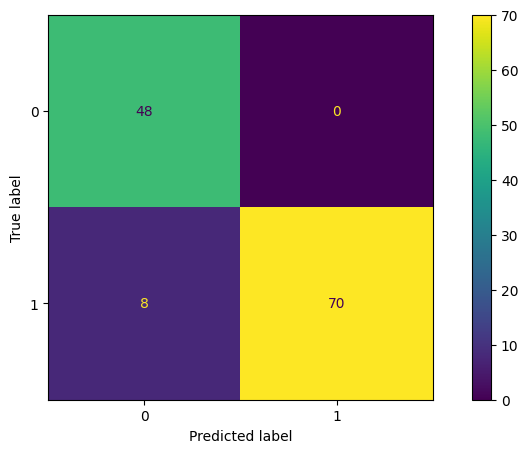

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [ ]:
#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

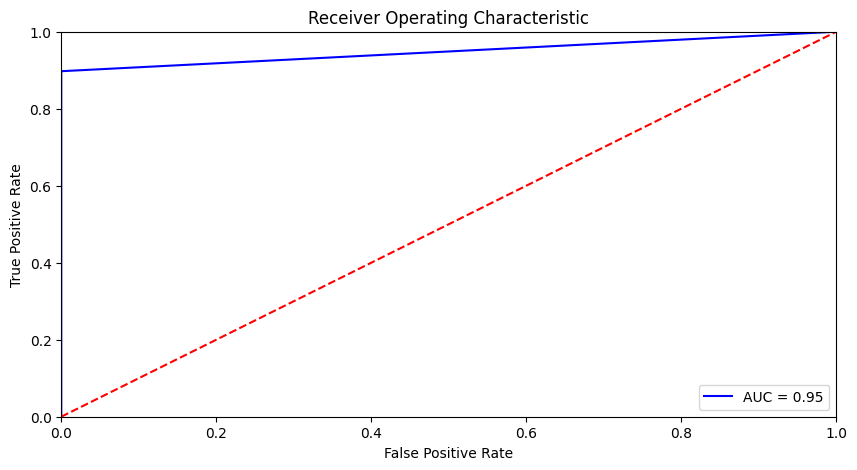

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

# VALIDACION CRUZADA DE LOS DOS MODELOS CON MEJORES PREDICCIONES (XGBOOST 2 Y DNN)

## XGBOOST RANDOM SEARCH

Accuracy de XGBoost:  0.9920634920634921
Training set score: 1.0000
Test set score: 0.9984
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



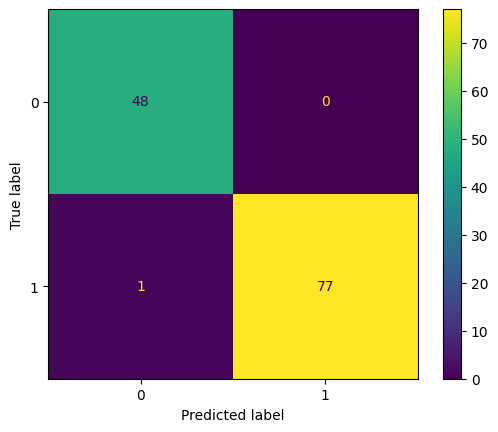

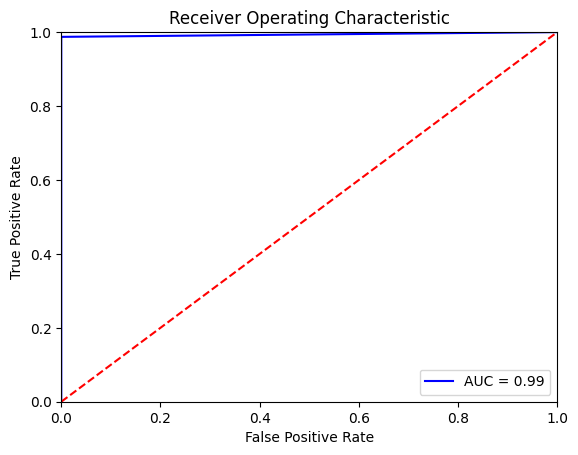

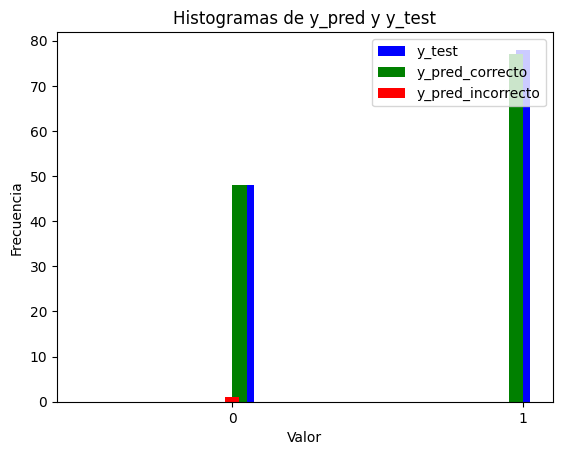

In [ ]:
params = {
    'learning_rate': np.arange(0.01, 0.1, 0.01),
    'max_depth': np.arange(3, 10, 1),
    'n_estimators': np.arange(100, 1000, 100),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.arange(0.0, 1.0, 0.1),
    'reg_lambda': np.arange(0.0, 1.0, 0.1),
    'gamma': np.arange(0.0, 5, 0.2),
    'min_child_weight': np.arange(1, 10, 2),
    'scale_pos_weight': np.arange(0.5, 5, 0.5)
}

# Crear un objeto XGBoost Classifier
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', seed=123)

# Crear un objeto RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf_xgb, param_distributions=params, n_iter=100, cv=5, scoring='roc_auc', random_state=42)

random_search.fit(X_train_1, y_train_1)
preds_xgb = random_search.predict(X_test_1)


accuracy_xgb = float(np.sum(preds_xgb == y_test_1))/y_test_1.shape[0]
print('Accuracy de XGBoost: ', accuracy_xgb)

print('Training set score: {:.4f}'.format(random_search.score(X_train_1, y_train_1)))

print('Test set score: {:.4f}'.format(random_search.score(X_test_1, y_test_1)))


clas_report=classification_report(y_test_1, preds_xgb)
print(clas_report)


confusion_matrix = metrics.confusion_matrix(y_test_1, preds_xgb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()


fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()


# Crear los arreglos booleanos
correcto = (y_test_1 == preds_xgb)
incorrecto = (y_test_1 != preds_xgb)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, preds_xgb)
y_pred_incorrecto = np.extract(incorrecto, preds_xgb)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

In [ ]:
# Obtener las probabilidades de pertenencia a cada clase
y_prob = random_search.predict_proba(X_test_1)[:,1]
y_prob[y_prob < 0.2] = 0

clas_report=classification_report(y_test_1, preds_xgb)
print(clas_report)

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': preds_xgb, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



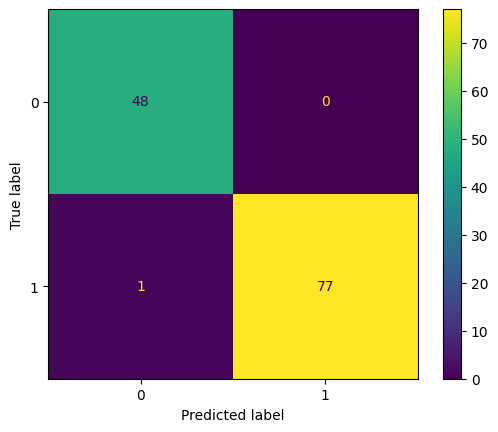

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, preds_xgb)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

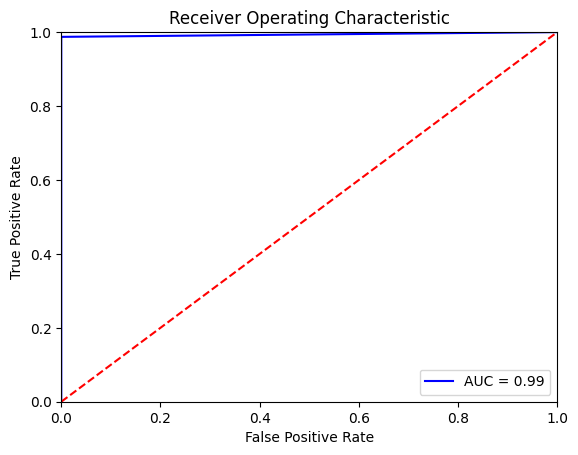

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

In [ ]:
y_pred=np.where(y_prob > 0.8, 1, 0)

clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

#Crear df con los valores reales y predichos
data_g = {'y_test': y_test_1, 'y_pred': y_pred, 'y_prob': y_prob}
df_g = pd.DataFrame(data_g)
df_g=df_g.reset_index(drop=True)
indices = df_g.index

goplot(df_g[['y_test','y_pred','y_prob']])

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        48
           1       1.00      0.95      0.97        78

    accuracy                           0.97       126
   macro avg       0.96      0.97      0.97       126
weighted avg       0.97      0.97      0.97       126



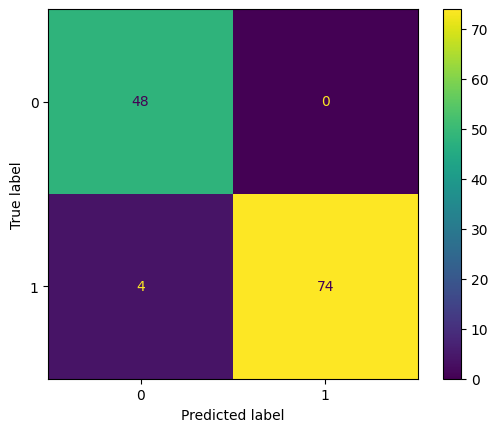

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

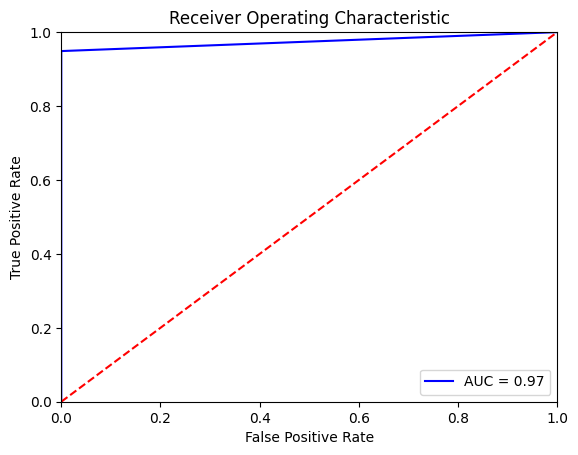

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.close()

In [ ]:
# Guarda el modelo utilizando joblib
joblib.dump(model, 'modelo_xgboost.pkl')

### validació xgboost

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True)

scores_model1 = cross_val_score(random_search, X_resampled, y_resampled, cv=kf)

print("Resultados de validación cruzada para el Modelo 1:")
print(scores_model1)
print("Promedio de precisión Modelo 1:", scores_model1.mean())

Resultados de validación cruzada para el Modelo 1:
[0.98917379 0.98684211 0.98964922 0.99565757 0.99393939]
Promedio de precisión Modelo 1: 0.9910524160612664


## NN profunda

### model

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(6,), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_1, y_train_1, epochs=50, batch_size=32, validation_data=(X_test_1, y_test_1))


y_pred = (model.predict(X_test_1) > 0.3).astype("int32")
print("Accuracy_test:", accuracy_score(y_test_1, y_pred))

Epoch 1/50
10/10 [==============================] - 6s 71ms/step - loss: 0.5966 - accuracy: 0.6575 - val_loss: 0.4493 - val_accuracy: 0.9048
Epoch 2/50
10/10 [==============================] - 0s 19ms/step - loss: 0.4090 - accuracy: 0.8801 - val_loss: 0.2915 - val_accuracy: 0.9206
Epoch 3/50
10/10 [==============================] - 0s 13ms/step - loss: 0.2740 - accuracy: 0.8973 - val_loss: 0.2293 - val_accuracy: 0.8968
Epoch 4/50
10/10 [==============================] - 0s 21ms/step - loss: 0.2093 - accuracy: 0.9110 - val_loss: 0.2134 - val_accuracy: 0.8968
Epoch 5/50
10/10 [==============================] - 0s 16ms/step - loss: 0.1815 - accuracy: 0.9212 - val_loss: 0.1725 - val_accuracy: 0.9206
Epoch 6/50
10/10 [==============================] - 0s 25ms/step - loss: 0.1626 - accuracy: 0.9384 - val_loss: 0.1808 - val_accuracy: 0.8968
Epoch 7/50
10/10 [==============================] - 0s 18ms/step - loss: 0.1439 - accuracy: 0.9418 - val_loss: 0.1311 - val_accuracy: 0.9444
Epoch 8/50
10

In [ ]:
clas_report=classification_report(y_test_1, y_pred)
print(clas_report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        48
           1       1.00      0.99      0.99        78

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126



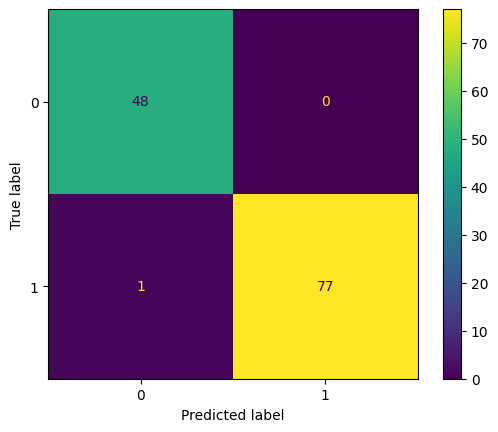

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test_1, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

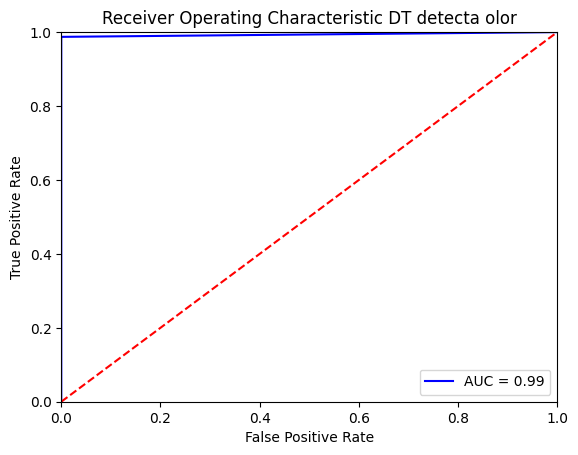

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_1, y_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic DT detecta olor')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
plt.savefig("roc_xg_DT_PRIMER_MODEL.png")
plt.close()

In [ ]:
f=pd.DataFrame(y_pred, columns=['y_pred'])
y_test_1=y_test_1.reset_index(drop=True)
f['y_test']=y_test_1
f

,y_pred,y_test
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
121,1,1
122,1,1
123,1,1
124,1,1


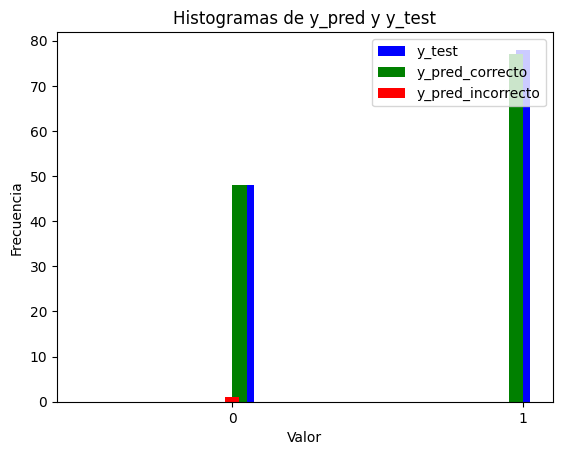

In [ ]:
# Crear los arreglos booleanos
correcto = (f.y_test == f.y_pred)
incorrecto = (f.y_test != f.y_pred)

# Crear los arreglos de valores predichos correctamente e incorrectamente
y_pred_correcto = np.extract(correcto, f.y_pred)
y_pred_incorrecto = np.extract(incorrecto, f.y_pred)


# Graficar los histogramas en cada subplot
plt.hist(y_test_1, bins=20, color='blue', label='y_test', align='right')
plt.hist(y_pred_correcto, bins=20, color='green', label='y_pred_correcto', align='mid')
plt.hist(y_pred_incorrecto, bins=20, color='red', label='y_pred_incorrecto', align='left')

# Establecer el título y las etiquetas de los ejes
plt.title('Histogramas de y_pred y y_test')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.legend(loc='upper right')
plt.xticks([0, 1])
# Mostrar el gráfico
plt.show()

### validació NN

In [ ]:
# fijar la semilla aleatoria para reproducibilidad
seed = 7
numpy.random.seed(seed)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []

for train, test in kfold.split(X_resampled, y_resampled):
    # crear el modelo
    X_train = X_resampled.loc[train]
    X_test = X_resampled.loc[test]
    y_train = y_resampled.loc[train]
    y_test = y_resampled.loc[test]


    model = Sequential()
    model.add(Dense(64, input_shape=(6,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    # compilar el modelo
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # ajustar el modelo
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # evaluar el modelo en el pliegue de prueba
    scores = model.evaluate(X_test, y_test, verbose=0)

    # imprimir la precisión del pliegue actual
    print("Precisión del pliegue:", scores[1])

    # almacenar la precisión del pliegue actual en la lista de puntajes
    cvscores.append(scores[1])

# imprimir los resultados finales
print("Resultados de validación cruzada:")
print(cvscores)
print("Precisión media: %.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores)*100, numpy.std(cvscores)*100))


Precisión del pliegue: 0.9523809552192688
Precisión del pliegue: 1.0
Precisión del pliegue: 0.976190447807312
Precisión del pliegue: 0.9638554453849792
Precisión del pliegue: 1.0
Resultados de validación cruzada:
[0.9523809552192688, 1.0, 0.976190447807312, 0.9638554453849792, 1.0]
Precisión media: 97.85% (+/- 1.91%)
